Este es un notebook para realizar las figuras que pueden representar los resultados del estudio del TFM como pueden ser:

Ahogamientos con respecto a:
    -Sexo
    -Lugar
    -Edad
    -Procedencia
    -Vigilancia
    -Hora
    -Mapa España

In [10]:
import pandas as pd

archivo = './ahogamientos-completo-procesado.csv'
data  = pd.read_csv(archivo, sep=',', encoding='utf-8')

data2 = data.copy()

a_categorica = [ 'Localidad',
 'Provincia',
 'CCAA',
 'Vigilancia',
 'Actividad',
 'Deteccion',
 'Intervencion',
 'Localizacion',
 'Riesgo',
 'Sexo',
 'Nacionalidad',
 'Origen',
 'Causa',
 'FactorRiesgo',
 'Antecedentes',
 'PrimerInterviniente',
 'MaterialRescate',
 'Extraccion',
 'TipoAhogamiento',
 'Reanimacion',
 'Pronostico']

a_numerica = ['IdAhogado', 'IdPersona', 'Edad']
              
a_fecha = ['Fecha', 'Hora']

for i in a_categorica:
    data2[i] = data2[i].astype('category')

for i in a_numerica:
    data2[i] = pd.to_numeric(data2[i], errors='coerce').dropna().astype('int64')

data2["Fecha"] = data2["Fecha"].str.split("T").str[0]
data2["Fecha"] = pd.to_datetime(data2["Fecha"], errors="coerce")

data2["Hora"] = data2["Hora"].str.split("T").str[1].str.replace("Z", "")
data2["Hora"] = pd.to_datetime(data2["Hora"], format="%H:%M:%S", errors="coerce").dt.time


In [11]:
print(data2['Fecha'].iloc[1078])

2015-04-23 00:00:00


Numero de personas ahogadas en españa en funcion del sexo

In [12]:
# Obtener el año más antiguo y más reciente
anio_min = data2['Fecha'].dt.year.min()
anio_max = data2['Fecha'].dt.year.max()

print(f"Año más antiguo: {anio_min}")
print(f"Año más reciente: {anio_max}")


Año más antiguo: 2011
Año más reciente: 2025


Calcular el número de filas con valores no válidos en la columna 'Edad'

In [13]:
from matplotlib.patches import FancyBboxPatch

In [ ]:

filas_no_validas = data2['Edad'].isna().sum()
print(filas_no_validas)

porcentaje_no_validas = (filas_no_validas / len(data2)) * 100

print(f"Porcentaje de filas sin datos válidos en la columna 'Edad': {porcentaje_no_validas:.2f}%")

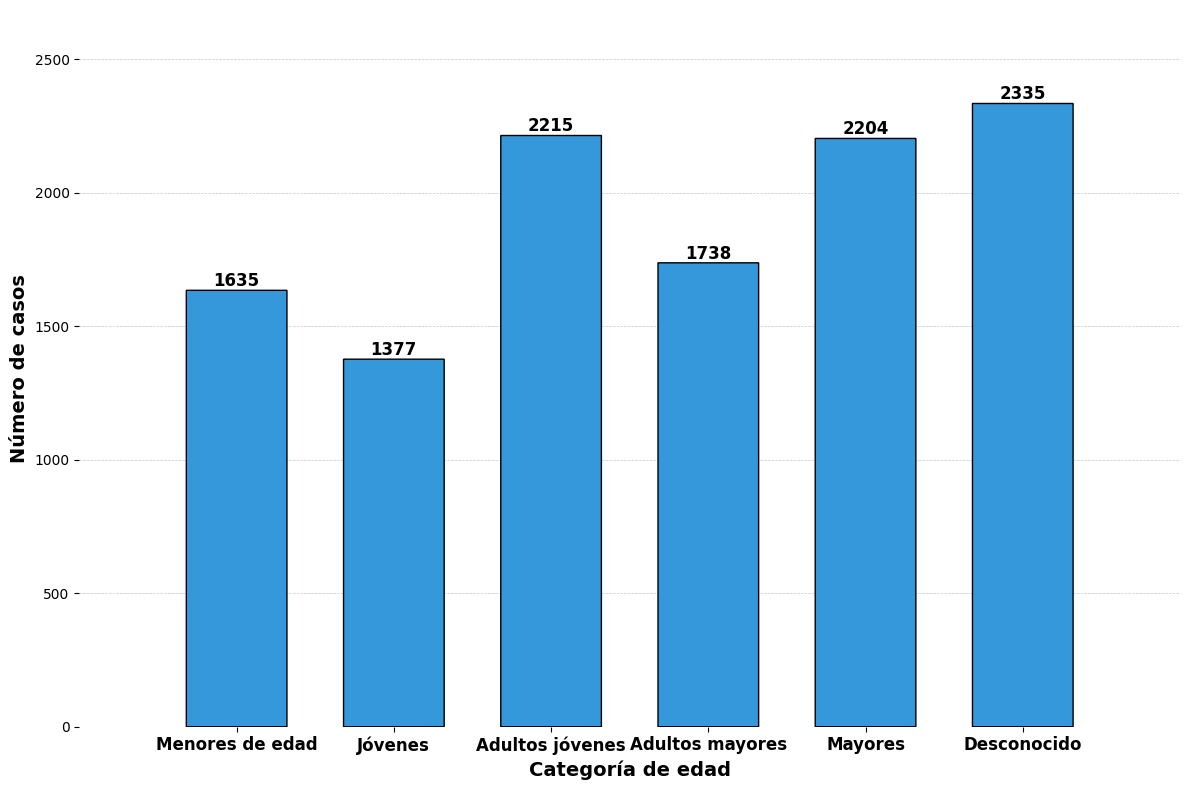

In [16]:
# Crear una nueva columna categórica basada en la edad
def categorizar_edad(edad):
    if edad < 18:
        return 'Menores de edad'
    elif 18 <= edad <= 30:
        return 'Jóvenes'
    elif 31 <= edad <= 50:
        return 'Adultos jóvenes'
    elif 51 <= edad <= 67:
        return 'Adultos mayores'
    elif edad > 67:
        return 'Mayores'
    else:
        return 'Desconocido'
orden_categorias = ['Menores de edad', 'Jóvenes', 'Adultos jóvenes', 'Adultos mayores', 'Mayores', 'Desconocido']
data2['Edad_categoria'] = data2['Edad'].apply(categorizar_edad)
data2['Edad_categoria'] = pd.Categorical(data2['Edad_categoria'], categories=orden_categorias, ordered=True)

edad_categoria_counts = data2['Edad_categoria'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 8))


ax.set_xlabel('Categoría de edad', fontsize=14, weight='bold')
ax.set_ylabel('Número de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(edad_categoria_counts)))
ax.set_xticklabels(edad_categoria_counts.index, rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(edad_categoria_counts.items()):
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),   
        bar_width, value,        
        boxstyle="round,pad=0.02",    
        linewidth=1,
        facecolor='#3498db',           
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, value + 1, str(int(value)),
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(edad_categoria_counts))
ax.set_ylim(0, max(edad_categoria_counts.values) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('histograma_edad5.png', dpi=150, bbox_inches='tight')
plt.show()


In [ ]:
# Calcular el porcentaje de cada categoría
total_datos = len(data2)
porcentaje_jovenes = (edad_categoria_counts['Jóvenes'] / total_datos) * 100
porcentaje_mayores = (edad_categoria_counts['Mayores'] / total_datos) * 100
porcentaje_adultos_jovenes = (edad_categoria_counts['Adultos jóvenes'] / total_datos) * 100

print(f"Porcentaje de Jóvenes: {porcentaje_jovenes:.2f}%")
print(f"Porcentaje de Mayores: {porcentaje_mayores:.2f}%")
print(f"Porcentaje de Adultos jóvenes: {porcentaje_adultos_jovenes:.2f}%")

SERIE TEMPORAL

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from datetime import datetime

data2['Fecha'] = pd.to_datetime(data2['Fecha'], errors='coerce')

data2['Año'] = data2['Fecha'].dt.year

año_actual = datetime.now().year
data_filtrada = data2[(data2['Año'] >= 2013) & (data2['Año'] <= año_actual)]

conteo_por_año = data_filtrada['Año'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_xlabel('Año', fontsize=14, weight='bold')
ax.set_ylabel('Número de ahogamientos', fontsize=14, weight='bold')
ax.set_xticks(range(len(conteo_por_año)))
ax.set_xticklabels(conteo_por_año.index, rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (año, total) in enumerate(conteo_por_año.items()):
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),    
        bar_width, total,        
        boxstyle="round,pad=0.02",
        linewidth=1,
        facecolor='#3498db',     
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, total + 1, str(int(total)),
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(conteo_por_año))
ax.set_ylim(0, max(conteo_por_año.values) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('serie_temporal.png', dpi=150, bbox_inches='tight')
plt.show()


SEXO 


In [ ]:


sexo_counts = data2['Sexo'].value_counts()

labels = sexo_counts.index
sizes = sexo_counts.values
colors = ['skyblue', 'lightcoral', 'lightgreen']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        label = labels[make_autopct.idx]
        make_autopct.idx += 1
        return f'{label} ({pct:.1f}%)'
    make_autopct.idx = 0
    return my_autopct

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    startangle=90,
    autopct=make_autopct(sizes)
)

for autotext in autotexts:
    autotext.set_fontweight('bold') 
    autotext.set_fontsize(12)


plt.axis('equal') 
plt.savefig('distribucion_sexo.png', dpi=150, bbox_inches='tight')
plt.show()


C:\Users\Pablo\AppData\Local\Temp\ipykernel_12732\2949767053.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data2.groupby(['Edad_categoria', 'Sexo']).size().reset_index(name='count')


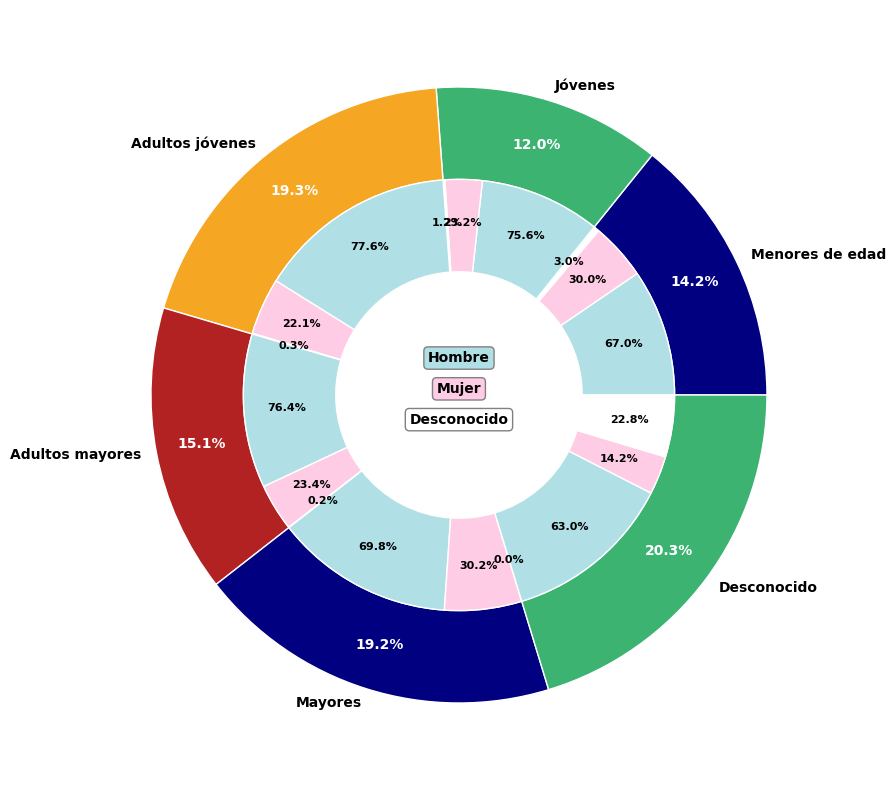

In [20]:


# Agrupar datos
grouped = data2.groupby(['Edad_categoria', 'Sexo']).size().reset_index(name='count')

# Anillo exterior: Edad
outer_labels = grouped['Edad_categoria'].unique()
outer_sizes = [grouped[grouped['Edad_categoria'] == age]['count'].sum() for age in outer_labels]
outer_colors = ['#000080', '#3CB371', '#F5A623', '#B22222'] 

inner_sizes = []
inner_colors = []
inner_labels = []
inner_percent_labels = []  
percent_by_group = []

color_hombre = '#B0E0E6' 
color_mujer = '#FFCCE5'  
color_sin_datos = '#FFFFFF'  

for age in outer_labels:
    subdf = grouped[grouped['Edad_categoria'] == age]
    total_count = subdf['count'].sum()
    for _, row in subdf.iterrows():
        inner_sizes.append(row['count']) 
        percent = row['count'] / total_count * 100
        inner_percent_labels.append(f"{percent:.1f}%")
        if row['Sexo'] == 'Hombre':
            inner_colors.append(color_hombre)
        elif row['Sexo'] == 'Mujer':
            inner_colors.append(color_mujer)
        else:
            inner_colors.append(color_sin_datos)
        inner_labels.append(row['Sexo'])

fig, ax = plt.subplots(figsize=(10, 8))

wedges1, texts1, autotexts1 = ax.pie(
    outer_sizes,
    radius=1,
    labels=outer_labels,
    labeldistance=1.05,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    autopct='%1.1f%%',
    pctdistance=0.85,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

for autotext in autotexts1:
    autotext.set_color('white')
for text in texts1:
    text.set_color('black')

wedges2, _ = ax.pie(
    inner_sizes,
    radius=0.7,
    labels=[''] * len(inner_labels),
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

for i, wedge in enumerate(wedges2):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    x = 0.7 * np.cos(np.deg2rad(angle)) * 0.8
    y = 0.7 * np.sin(np.deg2rad(angle)) * 0.8
    ax.text(x, y, inner_percent_labels[i], ha='center', va='center', fontsize=8, color='black',fontweight='bold')

legend_labels = ['Hombre', 'Mujer', 'Desconocido']
legend_colors = [color_hombre, color_mujer, color_sin_datos]

for i, (label, color) in enumerate(zip(legend_labels, legend_colors)):
    ax.text(
        0, 0.12 - i * 0.1,
        label,
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor=color, edgecolor='gray', boxstyle='round,pad=0.3')
    )

plt.tight_layout()
plt.savefig('distribucion_sexo_edad.png', dpi=150, bbox_inches='tight')
plt.show()


### Lugar
  

In [21]:
cuenta_lugares = data2['Localizacion'].value_counts()

cuenta_lugares.sum()

In [22]:
cuenta_lugares

Localizacion
Playas con vigilancia                                        3025
Playas sin vigilancia                                        2416
Rios, canales y similares                                    1817
Franja costera o alta mar                                    1197
Entorno marino                                               1042
Piscinas domesticas no vigiladas                              318
Puertos, embarcaderos, amarres                                311
Embalses, Pantanos                                            253
Piscinas publicas con vigilancia                              241
Sistemas de recogida, transporte o almacenamiento de agua     220
Otros                                                         206
Piscinas de equipamientos hoteleros y similares               190
Piscinas urbanización o privadas no vigiladas                 126
Aguas interiores sin vigilancia                                42
Piscinas de urbanizaciones con vigilancia                      

Se ha decidido esta agrupacion:

Playas con vigilancia  + Playas sin vigilancia + Franja costera o alta mar + Entorno marino ??¿¿Bien?

Rios, canales y similares + Embalses, Pantanos  + Aguas interiores sin vigilancia

Piscinas domésticas no vigiladas  + Piscinas públicas con vigilancia +Piscinas de equipamientos hoteleros y similares + Piscinas urbanización o privadas no vigiladas + Piscinas de urbanizaciones con vigilancia 

Puertos, embarcaderos, amarres + Sistemas de recogida, transporte o almacenamiento de agua + Otros + Contenedor de agua, cubo, fuente, etc + Parque acuático + Bañera + Sin Datos  


In [23]:
playas = (cuenta_lugares['Playas con vigilancia'] + 
        cuenta_lugares['Playas sin vigilancia']  +
        cuenta_lugares['Franja costera o alta mar'] + 
        cuenta_lugares['Entorno marino'])

rios = (cuenta_lugares['Rios, canales y similares'] + 
        cuenta_lugares['Embalses, Pantanos']  + 
        cuenta_lugares['Aguas interiores sin vigilancia'])

piscinas = (cuenta_lugares['Piscinas domesticas no vigiladas'] +
            cuenta_lugares['Piscinas publicas con vigilancia'] +
            cuenta_lugares['Piscinas de equipamientos hoteleros y similares'] +
            cuenta_lugares['Piscinas urbanización o privadas no vigiladas'] +
            cuenta_lugares['Piscinas de urbanizaciones con vigilancia'])

otros = (cuenta_lugares['Puertos, embarcaderos, amarres'] +
         cuenta_lugares['Sistemas de recogida, transporte o almacenamiento de agua'] +
         cuenta_lugares['Otros'] +
         cuenta_lugares['Contenedor de agua, cubo, fuente, etc'] +
         cuenta_lugares['Parque acuatico'] +
         cuenta_lugares['Bañera'] +
         cuenta_lugares['Sin Datos'])
         

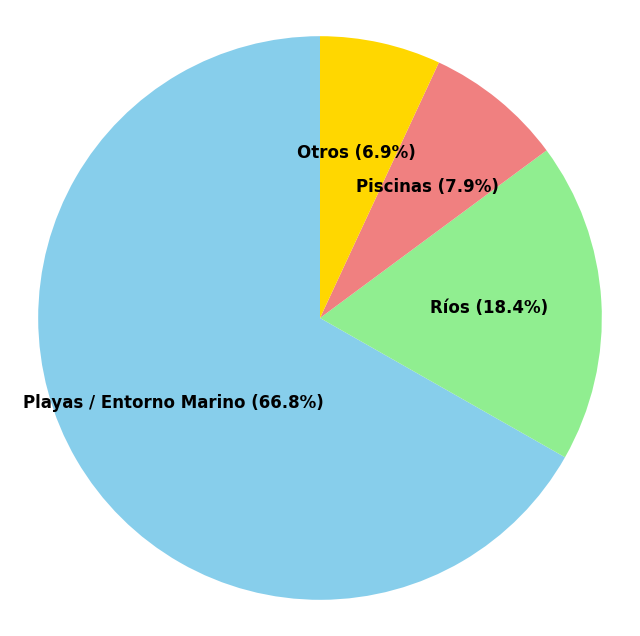

In [24]:
# Datos
labels = ['Playas / Entorno Marino', 'Ríos', 'Piscinas', 'Otros']
sizes = [round(playas / total * 100, 2), round(rios / total * 100, 2), round(piscinas / total * 100, 2), round(otros / total * 100, 2)]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        label = labels[make_autopct.idx]
        make_autopct.idx += 1
        return f'{label} ({pct:.1f}%)'
    make_autopct.idx = 0
    return my_autopct

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    startangle=90,
    autopct=make_autopct(sizes)
)

for autotext in autotexts:
    autotext.set_fontweight('bold') 
    autotext.set_fontsize(12)


plt.axis('equal') 

plt.savefig('distribucion_lugar.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_12732\2563199.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data2.groupby(['Edad_categoria', 'Localizacion_general']).size().unstack(fill_value=0)


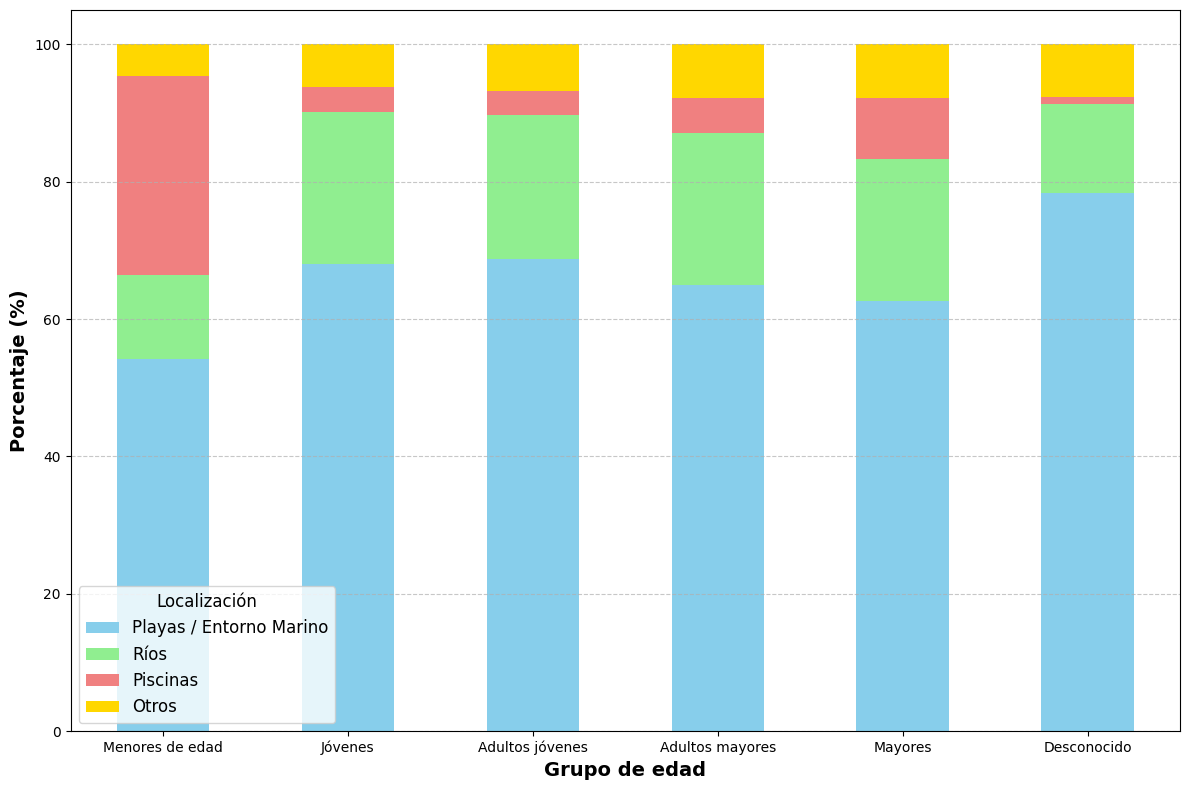

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Mapear lugares a categorías generales
# -------------------------------

mapa_localizaciones = {
    # Playas / Entorno Marino
    'Playas con vigilancia': 'Playas / Entorno Marino',
    'Playas sin vigilancia': 'Playas / Entorno Marino',
    'Franja costera o alta mar': 'Playas / Entorno Marino',
    'Entorno marino': 'Playas / Entorno Marino',

    # Ríos
    'Rios, canales y similares': 'Ríos',
    'Embalses, Pantanos': 'Ríos',
    'Aguas interiores sin vigilancia': 'Ríos',

    # Piscinas
    'Piscinas domesticas no vigiladas': 'Piscinas',
    'Piscinas publicas con vigilancia': 'Piscinas',
    'Piscinas de equipamientos hoteleros y similares': 'Piscinas',
    'Piscinas urbanización o privadas no vigiladas': 'Piscinas',
    'Piscinas de urbanizaciones con vigilancia': 'Piscinas',

    # Otros
    'Puertos, embarcaderos, amarres': 'Otros',
    'Sistemas de recogida, transporte o almacenamiento de agua': 'Otros',
    'Otros': 'Otros',
    'Contenedor de agua, cubo, fuente, etc': 'Otros',
    'Parque acuatico': 'Otros',
    'Bañera': 'Otros',
    'Sin Datos': 'Otros'
}

data2['Localizacion_general'] = data2['Localizacion'].map(mapa_localizaciones)

# -------------------------------
# 2. Categorizar edades
# -------------------------------

def categorizar_edad(edad):
    if edad < 18:
        return 'Menores de edad'
    elif 18 <= edad <= 30:
        return 'Jóvenes'
    elif 31 <= edad <= 50:
        return 'Adultos jóvenes'
    elif 51 <= edad <= 67:
        return 'Adultos mayores'
    elif edad > 67:
        return 'Mayores'
    else:
        return 'Desconocido'

orden_categorias = ['Menores de edad', 'Jóvenes', 'Adultos jóvenes', 'Adultos mayores', 'Mayores', 'Desconocido']
data2['Edad_categoria'] = pd.Categorical(data2['Edad'].apply(categorizar_edad), categories=orden_categorias, ordered=True)

# -------------------------------
# 3. Agrupar y calcular porcentajes
# -------------------------------

grouped = data2.groupby(['Edad_categoria', 'Localizacion_general']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Orden de las columnas y colores
orden_localizaciones = ['Playas / Entorno Marino', 'Ríos', 'Piscinas', 'Otros']
colores = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
grouped_percent = grouped_percent[orden_localizaciones]

# -------------------------------
# 4. Gráfico de barras apiladas
# -------------------------------

ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=colores)

plt.xlabel('Grupo de edad', fontsize=14, weight='bold')
plt.ylabel('Porcentaje (%)', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Localización', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('distribucion_lugar_edad.png', dpi=150, bbox_inches='tight')
plt.show()


In [26]:
casos_menores_piscina = grouped.loc['Menores de edad', 'Piscinas']

porcentaje_menores_piscina = (casos_menores_piscina / total_datos) * 100
print(f"Porcentaje de casos de menores de edad y piscina: {porcentaje_menores_piscina:.2f}%")

total_menores = grouped.loc['Menores de edad'].sum()
porcentaje_menores_piscina_grupo = (casos_menores_piscina / total_menores) * 100
print(f"Porcentaje de casos de menores de edad y piscina (respecto a su grupo): {porcentaje_menores_piscina_grupo:.2f}%")

Porcentaje de casos de menores de edad y piscina: 4.11%
Porcentaje de casos de menores de edad y piscina (respecto a su grupo): 28.95%


### Edad

Vamos a discretizar los datos a gusto, es decir, 

Niños -10
Adolescentes: 10-25
Jovenes: 25-40
Adultos1: 40-60
Jubilados 1: 60-75
Jubilados 2: 75-

In [27]:
valores_no_validos = data2[~data2['Edad'].between(0, 150, inclusive='both') | data2['Edad'].isna()]

valores_no_validos[['IdAhogado', 'Edad']]

,IdAhogado,Edad
31,489,NaN
51,509,NaN
54,512,NaN
62,517,NaN
85,538,NaN
...,...,...
11481,10108,NaN
11482,10109,NaN
11483,10110,NaN
11498,10119,NaN


In [28]:
# Solo modificas este vector
intervalos = [15, 30, 45, 60, 75]  # Valores intermedios

bins = [0] + intervalos + [float('inf')]

labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 2)] + ["> 75", "Desconocido"]

data2['Edad_discretizada'] = pd.cut(data2['Edad'], bins=bins, labels=labels[:-1], right=False)
data2['Edad_discretizada'] = data2['Edad_discretizada'].cat.add_categories("Desconocido")
data2['Edad_discretizada'].fillna("Desconocido", inplace=True)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_12732\2556314468.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['Edad_discretizada'].fillna("Desconocido", inplace=True)


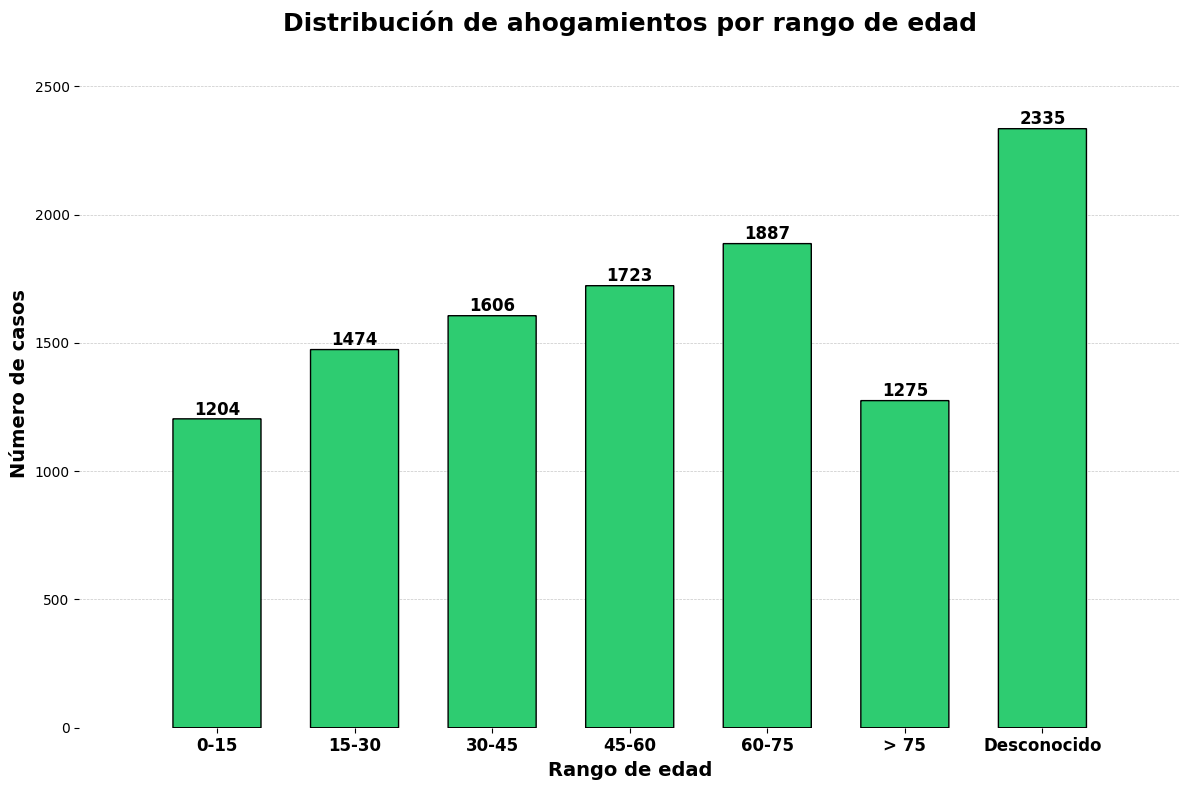

In [29]:


edad_counts = data2['Edad_discretizada'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Distribución de ahogamientos por rango de edad',
             fontsize=18, weight='bold')
ax.set_xlabel('Rango de edad', fontsize=14, weight='bold')
ax.set_ylabel('Número de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(edad_counts)))
ax.set_xticklabels(edad_counts.index, rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(edad_counts.items()):
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),    
        bar_width, value,           
        boxstyle="round,pad=0.02",    
        linewidth=1,
        facecolor='#2ecc71',
        edgecolor='black'
    )
    ax.add_patch(rect)
    ax.text(i, value + 1, str(int(value)),
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(edad_counts))
ax.set_ylim(0, max(edad_counts) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


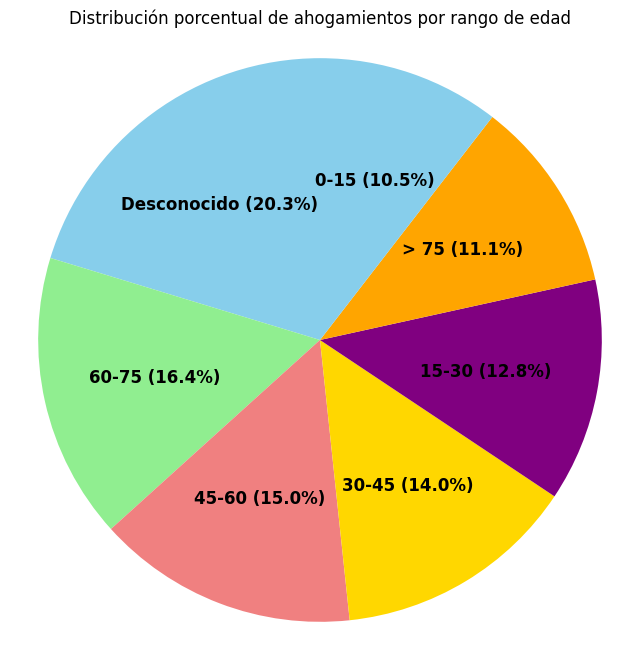

In [30]:
edad_counts = data2['Edad_discretizada'].value_counts()

labels = edad_counts.index
sizes = [round(count / total * 100, 2) for count in edad_counts.values]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'purple', 'orange']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        label = labels[make_autopct.idx]
        make_autopct.idx += 1
        return f'{label} ({pct:.1f}%)'
    make_autopct.idx = 0
    return my_autopct

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    colors=colors,
    startangle=90,
    autopct=make_autopct(sizes)
)

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Distribución porcentual de ahogamientos por rango de edad')
plt.axis('equal') 
plt.show()

### Vigilancia

In [31]:
vigilancia_percent = (data2['Vigilancia'].value_counts(normalize=True) * 100).round(2)

print(vigilancia_percent)

Vigilancia
No vigilado                        68.57
En horario de vigilancia           27.40
Fuera del horario de vigilancia     3.79
Sin datos                           0.24
Name: proportion, dtype: float64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_12732\48421451.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_vigilada.groupby(['Edad_categoria', 'Vigilancia']).size().unstack(fill_value=0)


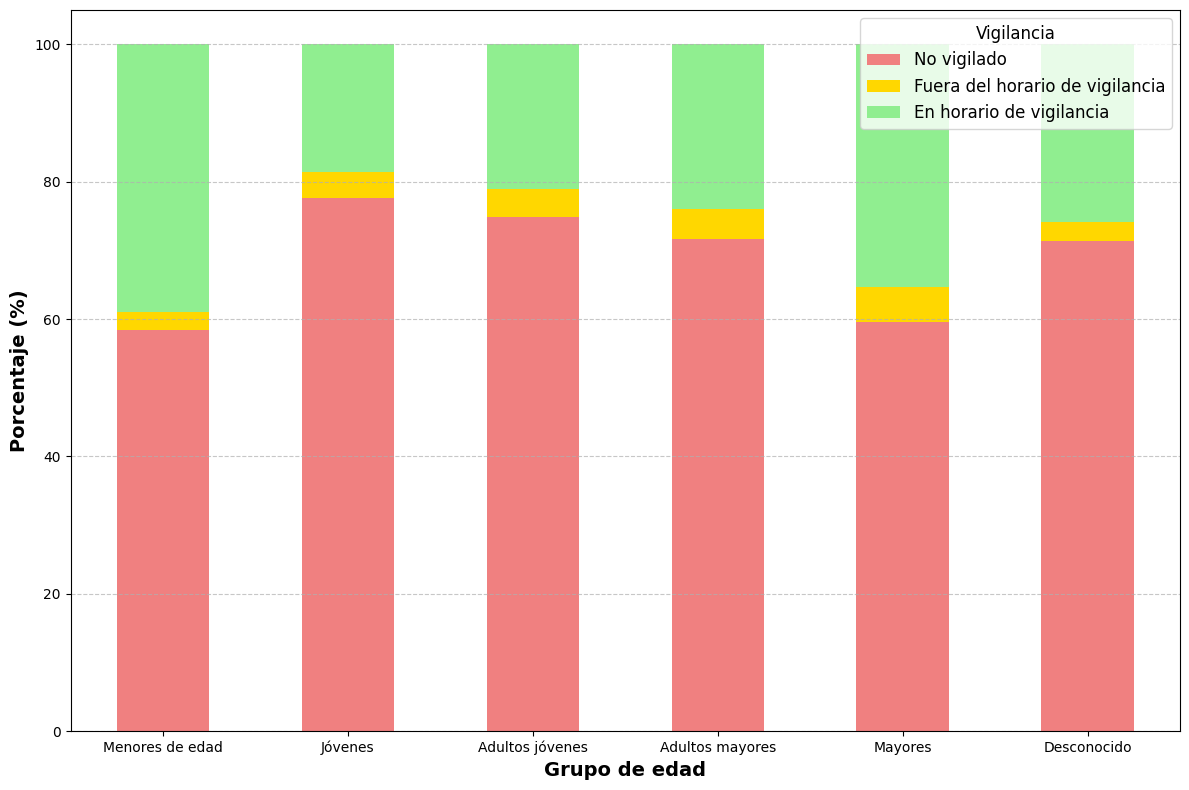

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Categorizar edades
# -------------------------------

def categorizar_edad(edad):
    if edad < 18:
        return 'Menores de edad'
    elif 18 <= edad <= 30:
        return 'Jóvenes'
    elif 31 <= edad <= 50:
        return 'Adultos jóvenes'
    elif 51 <= edad <= 67:
        return 'Adultos mayores'
    elif edad > 67:
        return 'Mayores'
    else:
        return 'Desconocido'

orden_categorias = ['Menores de edad', 'Jóvenes', 'Adultos jóvenes', 'Adultos mayores', 'Mayores', 'Desconocido']
data2['Edad_categoria'] = pd.Categorical(data2['Edad'].apply(categorizar_edad), categories=orden_categorias, ordered=True)

# -------------------------------
# 2. Filtrar datos: quitar "Sin datos" en vigilancia
# -------------------------------

data_vigilada = data2[data2['Vigilancia'] != 'Sin datos'].copy()

# -------------------------------
# 3. Agrupar y calcular porcentajes
# -------------------------------

grouped = data_vigilada.groupby(['Edad_categoria', 'Vigilancia']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

orden_vigilancia = ['No vigilado', 'Fuera del horario de vigilancia', 'En horario de vigilancia']
colores = ['lightcoral', 'gold', 'lightgreen']
grouped_percent = grouped_percent[orden_vigilancia]

# -------------------------------
# 4. Gráfico de barras apiladas
# -------------------------------

ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=colores)

plt.xlabel('Grupo de edad', fontsize=14, weight='bold')
plt.ylabel('Porcentaje (%)', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Vigilancia', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('distribucion_vigilancia_edad.png', dpi=150, bbox_inches='tight')
plt.show()


In [33]:

for clase in grouped_percent.columns:
    max_val = grouped_percent[clase].max()
    min_val = grouped_percent[clase].min()
    grupo_max = grouped_percent[grouped_percent[clase] == max_val].index[0]
    grupo_min = grouped_percent[grouped_percent[clase] == min_val].index[0]
    
    print(f"Clase: {clase}")
    print(f"Máximo: {max_val:.2f}% (Grupo: {grupo_max})")
    print(f"Mínimo: {min_val:.2f}% (Grupo: {grupo_min})\n")

Clase: No vigilado
🔺 Máximo: 77.66% (Grupo: Jóvenes)
🔻 Mínimo: 58.46% (Grupo: Menores de edad)

Clase: Fuera del horario de vigilancia
🔺 Máximo: 5.23% (Grupo: Mayores)
🔻 Mínimo: 2.51% (Grupo: Menores de edad)

Clase: En horario de vigilancia
🔺 Máximo: 39.03% (Grupo: Menores de edad)
🔻 Mínimo: 18.63% (Grupo: Jóvenes)



### Hora


Esta categoria la vamos a dividir en lo siguiente:

-Madrugada 0-7h
-Mañana 7-13h
-Mediodia 13-18h
-Tarde/Noche 18-24h

In [34]:
data2['Hora'].loc[3]

datetime.time(15, 35)

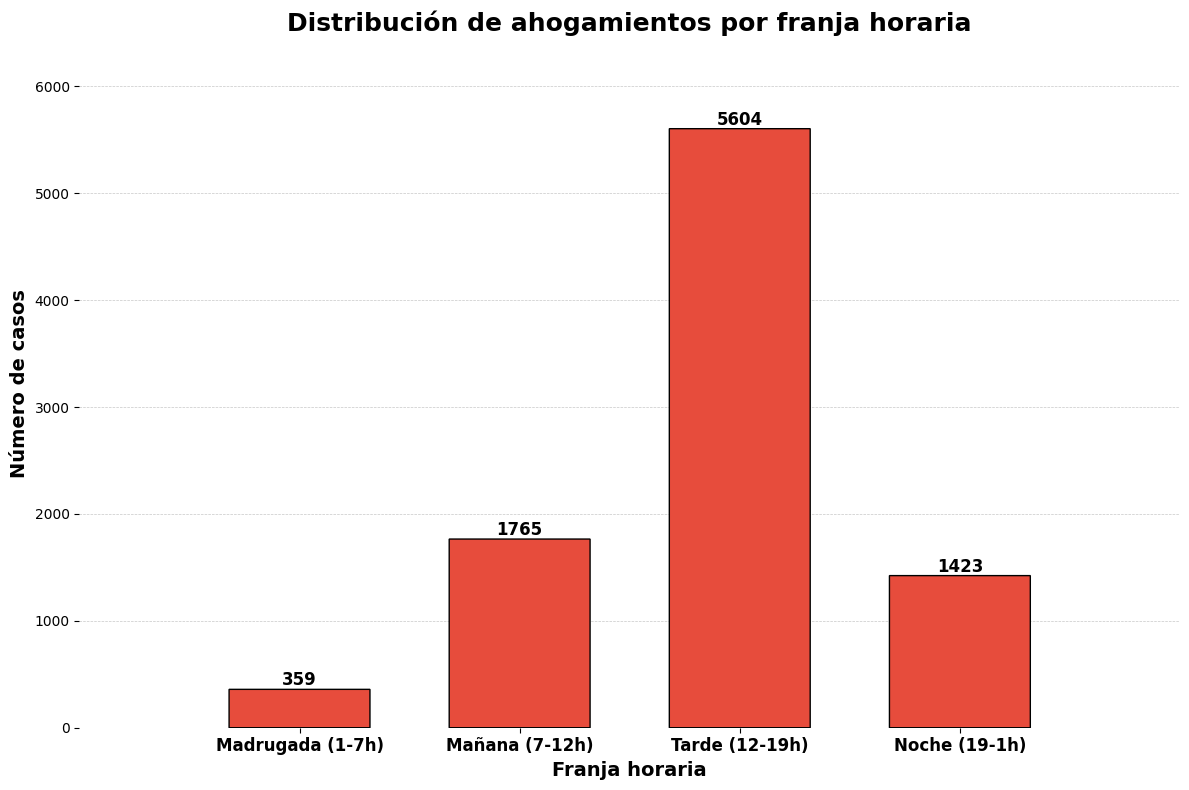

In [35]:
from datetime import time
from matplotlib.patches import FancyBboxPatch
import matplotlib.pyplot as plt

franjas = {
    'Madrugada (1-7h)': (time(1, 0), time(7, 0)),
    'Mañana (7-12h)': (time(7, 0), time(12, 0)),
    'Tarde (12-19h)': (time(12, 0), time(19, 0)),
    'Noche (19-1h)': (time(19, 0), time(23, 59, 59), time(0, 0), time(1, 0))
}

hora_counts = {franja: data2[(data2["Hora"] >= rango[0]) & (data2["Hora"] < rango[1])].shape[0]
               for franja, rango in franjas.items()}

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Distribución de ahogamientos por franja horaria',
             fontsize=18, weight='bold')
ax.set_xlabel('Franja horaria', fontsize=14, weight='bold')
ax.set_ylabel('Número de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(hora_counts)))
ax.set_xticklabels(hora_counts.keys(), rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(hora_counts.items()):
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),      
        bar_width, value,              
        boxstyle="round,pad=0.02",     
        linewidth=1,
        facecolor='#e74c3c',        
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, value + 1, str(int(value)),
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(hora_counts))
ax.set_ylim(0, max(hora_counts.values()) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

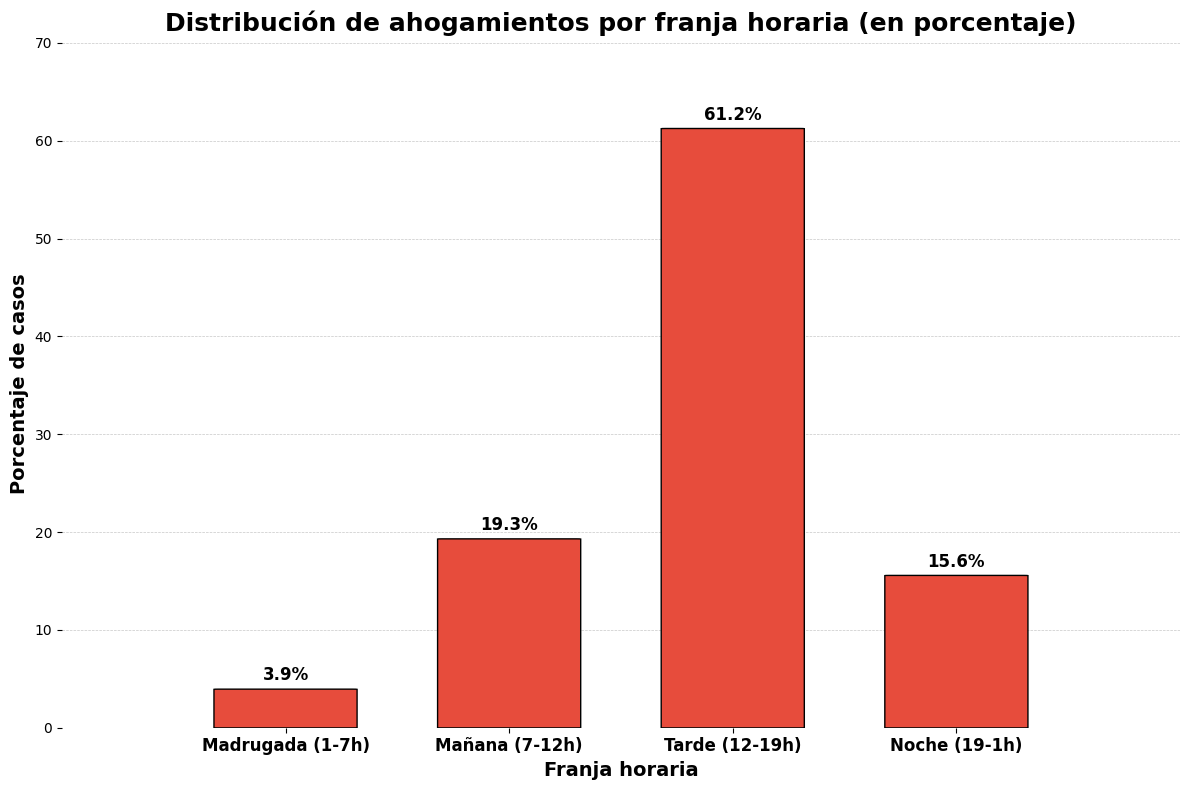

In [36]:
from datetime import time
from matplotlib.patches import FancyBboxPatch

import matplotlib.pyplot as plt

franjas = {
    'Madrugada (1-7h)': (time(1, 0), time(7, 0)),
    'Mañana (7-12h)': (time(7, 0), time(12, 0)),
    'Tarde (12-19h)': (time(12, 0), time(19, 0)),
    'Noche (19-1h)': (time(19, 0), time(23, 59, 59), time(0, 0), time(1, 0))
}


hora_counts = {franja: data2[(data2["Hora"] >= rango[0]) & (data2["Hora"] < rango[1])].shape[0]
               for franja, rango in franjas.items()}

total_ahogamientos = sum(hora_counts.values())

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Distribución de ahogamientos por franja horaria (en porcentaje)',
             fontsize=18, weight='bold')
ax.set_xlabel('Franja horaria', fontsize=14, weight='bold')
ax.set_ylabel('Porcentaje de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(hora_counts)))
ax.set_xticklabels(hora_counts.keys(), rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(hora_counts.items()):
    porcentaje = (value / total_ahogamientos) * 100
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),       
        bar_width, porcentaje,       
        boxstyle="round,pad=0.02",   
        linewidth=1,
        facecolor='#e74c3c',     
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, porcentaje + 0.5, f"{porcentaje:.1f}%",
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(hora_counts))
ax.set_ylim(0, max((value / total_ahogamientos) * 100 for value in hora_counts.values()) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

Ahora vamos a cotar mucho mas las horas donde mas gente sse ahoga que son entre las 12 y las 18

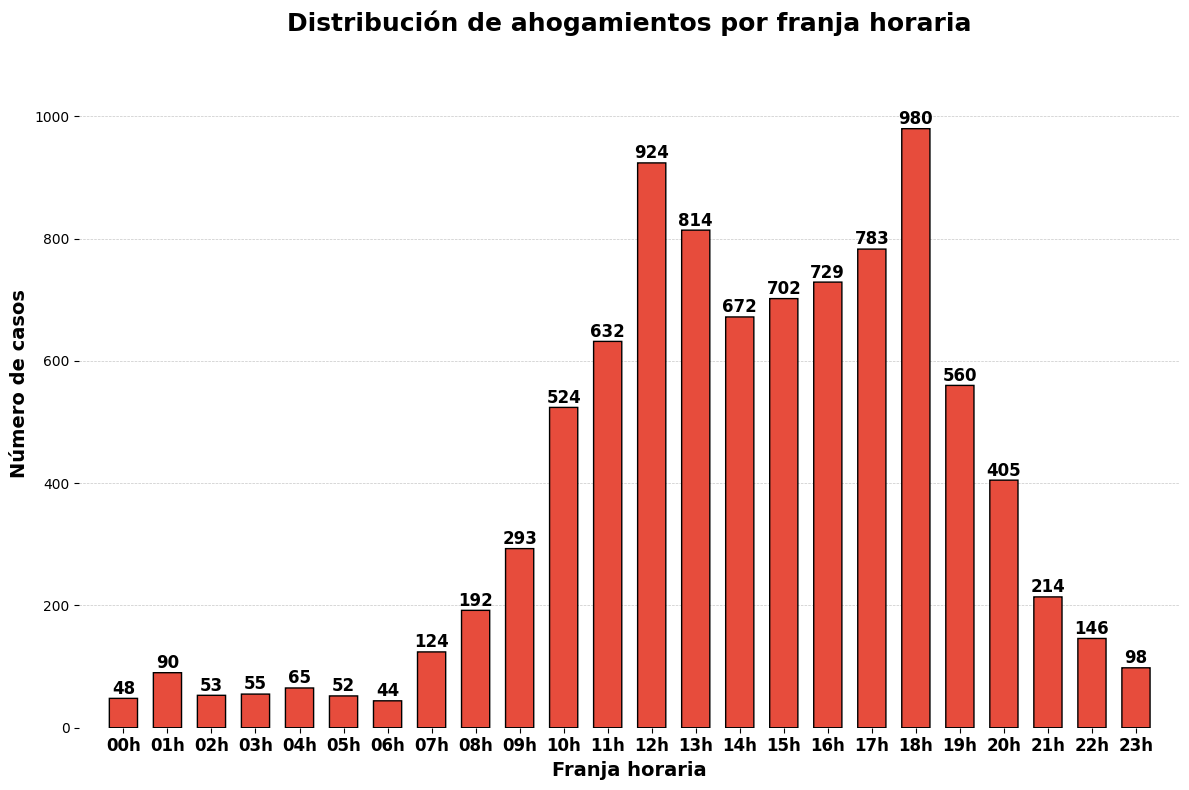

In [37]:
from datetime import time
from matplotlib.patches import FancyBboxPatch
import matplotlib.pyplot as plt
franjas = {
    '00h': (time(0, 0), time(1, 0)),
    '01h': (time(1, 0), time(2, 0)),
    '02h': (time(2, 0), time(3, 0)),
    '03h': (time(3, 0), time(4, 0)),
    '04h': (time(4, 0), time(5, 0)),
    '05h': (time(5, 0), time(6, 0)),
    '06h': (time(6, 0), time(7, 0)),
    '07h': (time(7, 0), time(8, 0)),
    '08h': (time(8, 0), time(9, 0)),
    '09h': (time(9, 0), time(10, 0)),
    '10h': (time(10, 0), time(11, 0)),
    '11h': (time(11, 0), time(12, 0)),
    '12h': (time(12, 0), time(13, 0)),
    '13h': (time(13, 0), time(14, 0)),
    '14h': (time(14, 0), time(15, 0)),
    '15h': (time(15, 0), time(16, 0)),
    '16h': (time(16, 0), time(17, 0)),
    '17h': (time(17, 0), time(18, 0)),
    '18h': (time(18, 0), time(19, 0)),
    '19h': (time(19, 0), time(20, 0)),
    '20h': (time(20, 0), time(21, 0)),
    '21h': (time(21, 0), time(22, 0)),
    '22h': (time(22, 0), time(23, 0)),
    '23h': (time(23, 0), time(23, 59, 59)),
}

hora_counts = {franja: data2[(data2["Hora"] >= rango[0]) & (data2["Hora"] < rango[1])].shape[0]
               for franja, rango in franjas.items()}

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Distribución de ahogamientos por franja horaria',
             fontsize=18, weight='bold')
ax.set_xlabel('Franja horaria', fontsize=14, weight='bold')
ax.set_ylabel('Número de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(hora_counts)))
ax.set_xticklabels(hora_counts.keys(), rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(hora_counts.items()):
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),     
        bar_width, value,             
        boxstyle="round,pad=0.02",    
        linewidth=1,
        facecolor='#e74c3c',        
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, value + 1, str(int(value)),
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(hora_counts))
ax.set_ylim(0, max(hora_counts.values()) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

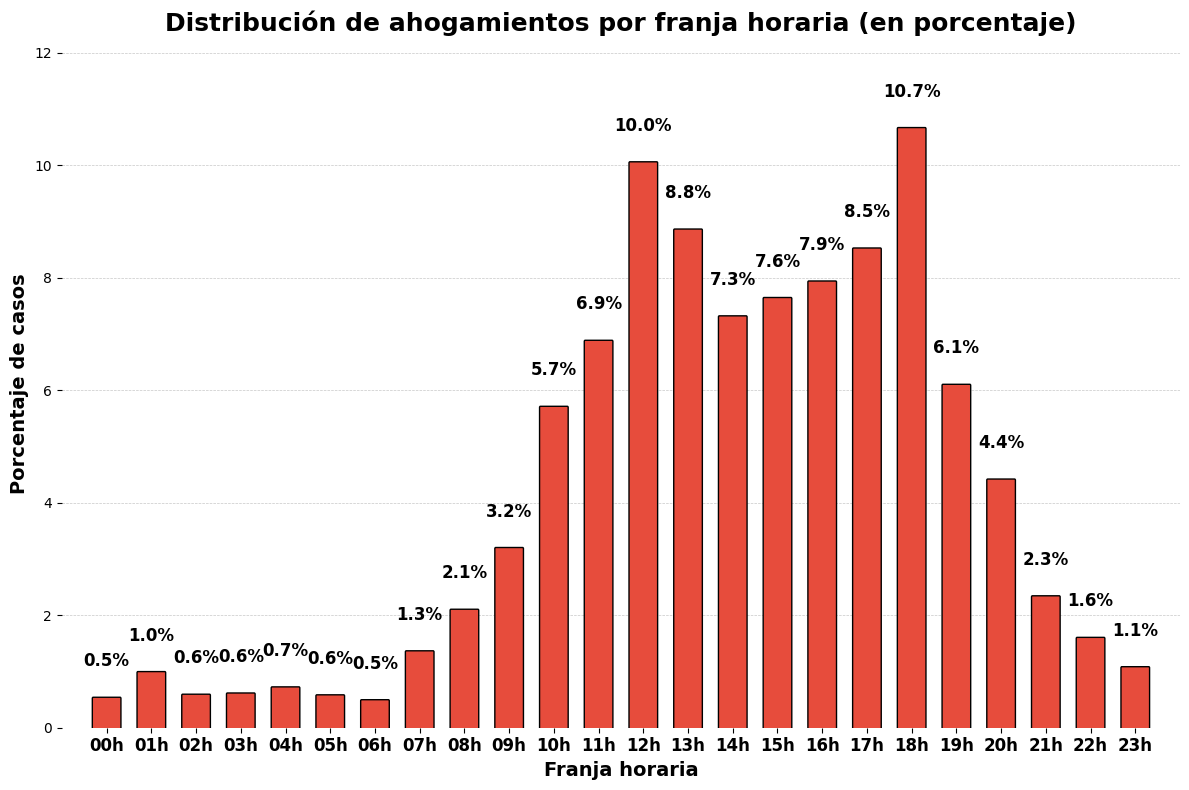

In [38]:
from datetime import time
from matplotlib.patches import FancyBboxPatch

import matplotlib.pyplot as plt

franjas = {
    '00h': (time(0, 0), time(1, 0)),
    '01h': (time(1, 0), time(2, 0)),
    '02h': (time(2, 0), time(3, 0)),
    '03h': (time(3, 0), time(4, 0)),
    '04h': (time(4, 0), time(5, 0)),
    '05h': (time(5, 0), time(6, 0)),
    '06h': (time(6, 0), time(7, 0)),
    '07h': (time(7, 0), time(8, 0)),
    '08h': (time(8, 0), time(9, 0)),
    '09h': (time(9, 0), time(10, 0)),
    '10h': (time(10, 0), time(11, 0)),
    '11h': (time(11, 0), time(12, 0)),
    '12h': (time(12, 0), time(13, 0)),
    '13h': (time(13, 0), time(14, 0)),
    '14h': (time(14, 0), time(15, 0)),
    '15h': (time(15, 0), time(16, 0)),
    '16h': (time(16, 0), time(17, 0)),
    '17h': (time(17, 0), time(18, 0)),
    '18h': (time(18, 0), time(19, 0)),
    '19h': (time(19, 0), time(20, 0)),
    '20h': (time(20, 0), time(21, 0)),
    '21h': (time(21, 0), time(22, 0)),
    '22h': (time(22, 0), time(23, 0)),
    '23h': (time(23, 0), time(23, 59, 59)),
}

hora_counts = {franja: data2[(data2["Hora"] >= rango[0]) & (data2["Hora"] < rango[1])].shape[0]
               for franja, rango in franjas.items()}

total_ahogamientos = sum(hora_counts.values())

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Distribución de ahogamientos por franja horaria (en porcentaje)',
             fontsize=18, weight='bold')
ax.set_xlabel('Franja horaria', fontsize=14, weight='bold')
ax.set_ylabel('Porcentaje de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(hora_counts)))
ax.set_xticklabels(hora_counts.keys(), rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(hora_counts.items()):
    porcentaje = (value / total_ahogamientos) * 100
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0), 
        bar_width, porcentaje,        
        boxstyle="round,pad=0.02",   
        linewidth=1,
        facecolor='#e74c3c',        
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, porcentaje + 0.5, f"{porcentaje:.1f}%",
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(hora_counts))
ax.set_ylim(0, max((value / total_ahogamientos) * 100 for value in hora_counts.values()) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('distribucion_hora.png', dpi=300, bbox_inches='tight')
plt.show()

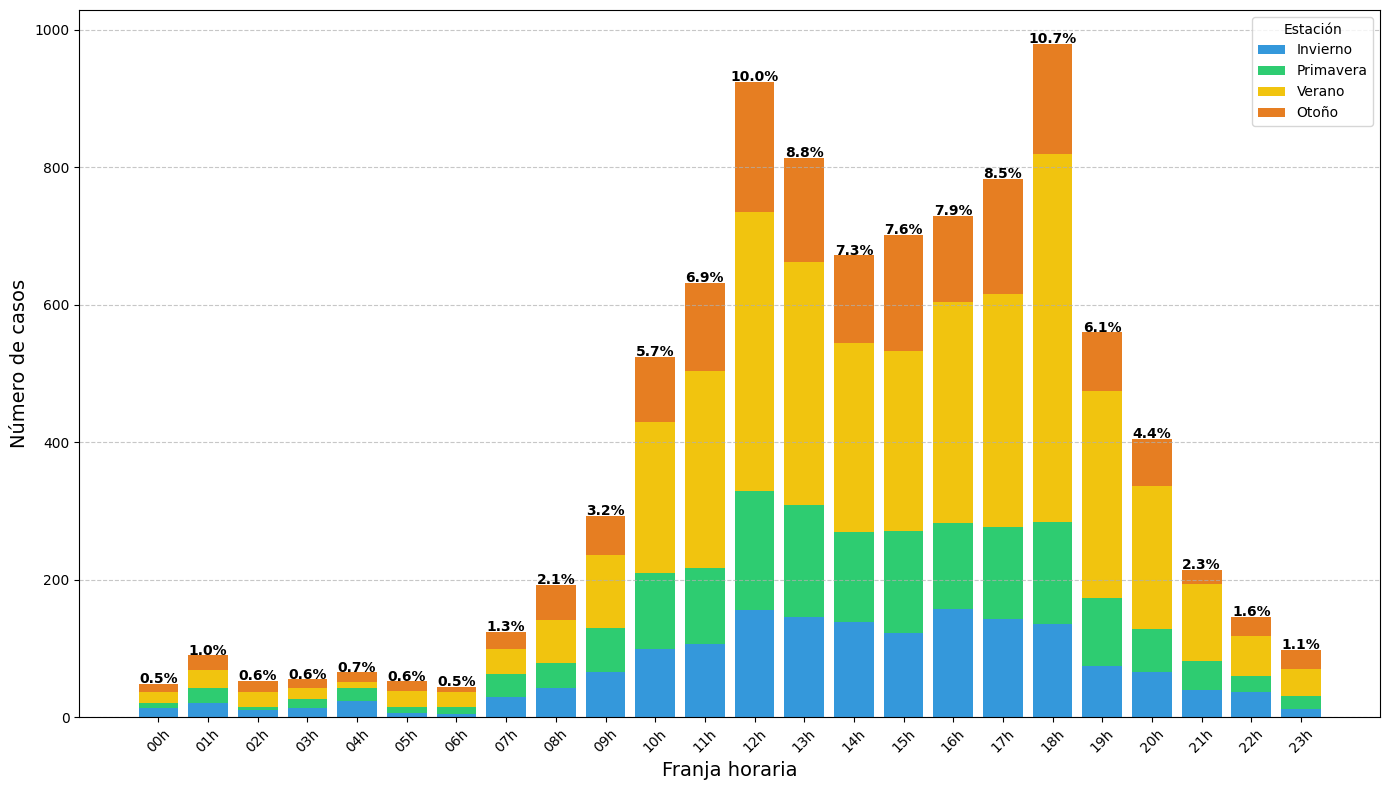

In [39]:
from datetime import time
import matplotlib.pyplot as plt

def obtener_estacion(fecha):
    if fecha.month in [12, 1, 2]:
        return 'Invierno'
    elif fecha.month in [3, 4, 5]:
        return 'Primavera'
    elif fecha.month in [6, 7, 8]:
        return 'Verano'
    elif fecha.month in [9, 10, 11]:
        return 'Otoño'

data2["Estacion"] = data2["Fecha"].apply(obtener_estacion)

franjas = {
    '00h': (time(0, 0), time(1, 0)),
    '01h': (time(1, 0), time(2, 0)),
    '02h': (time(2, 0), time(3, 0)),
    '03h': (time(3, 0), time(4, 0)),
    '04h': (time(4, 0), time(5, 0)),
    '05h': (time(5, 0), time(6, 0)),
    '06h': (time(6, 0), time(7, 0)),
    '07h': (time(7, 0), time(8, 0)),
    '08h': (time(8, 0), time(9, 0)),
    '09h': (time(9, 0), time(10, 0)),
    '10h': (time(10, 0), time(11, 0)),
    '11h': (time(11, 0), time(12, 0)),
    '12h': (time(12, 0), time(13, 0)),
    '13h': (time(13, 0), time(14, 0)),
    '14h': (time(14, 0), time(15, 0)),
    '15h': (time(15, 0), time(16, 0)),
    '16h': (time(16, 0), time(17, 0)),
    '17h': (time(17, 0), time(18, 0)),
    '18h': (time(18, 0), time(19, 0)),
    '19h': (time(19, 0), time(20, 0)),
    '20h': (time(20, 0), time(21, 0)),
    '21h': (time(21, 0), time(22, 0)),
    '22h': (time(22, 0), time(23, 0)),
    '23h': (time(23, 0), time(23, 59, 59)),
}

estaciones = ['Invierno', 'Primavera', 'Verano', 'Otoño']
conteo_franja_estacion = {franja: {est: 0 for est in estaciones} for franja in franjas.keys()}

for franja, (inicio, fin) in franjas.items():
    for est in estaciones:
        conteo = data2[
            (data2["Hora"] >= inicio) &
            (data2["Hora"] < fin) &
            (data2["Estacion"] == est)
        ].shape[0]
        conteo_franja_estacion[franja][est] = conteo

labels = list(franjas.keys())
inv = [conteo_franja_estacion[franja]['Invierno'] for franja in labels]
pri = [conteo_franja_estacion[franja]['Primavera'] for franja in labels]
ver = [conteo_franja_estacion[franja]['Verano'] for franja in labels]
oto = [conteo_franja_estacion[franja]['Otoño'] for franja in labels]

totales_por_hora = [i + p + v + o for i, p, v, o in zip(inv, pri, ver, oto)]
total_global = sum(totales_por_hora)

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlabel("Franja horaria", fontsize=14)

bar1 = ax.bar(labels, inv, label='Invierno', color='#3498db')
bar2 = ax.bar(labels, pri, bottom=inv, label='Primavera', color='#2ecc71')
bar3 = ax.bar(labels, ver, bottom=[i+p for i, p in zip(inv, pri)], label='Verano', color='#f1c40f')
bar4 = ax.bar(labels, oto, bottom=[i+p+v for i, p, v in zip(inv, pri, ver)], label='Otoño', color='#e67e22')

for i, total in enumerate(totales_por_hora):
    if total > 0:
        porcentaje = (total / total_global) * 100
        ax.text(i, total + 1, f"{porcentaje:.1f}%", ha='center', fontsize=10, weight='bold')

ax.legend(title='Estación')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('distribucion_hora_edad.png', dpi=150, bbox_inches='tight')
plt.show()


### Estacionalidad


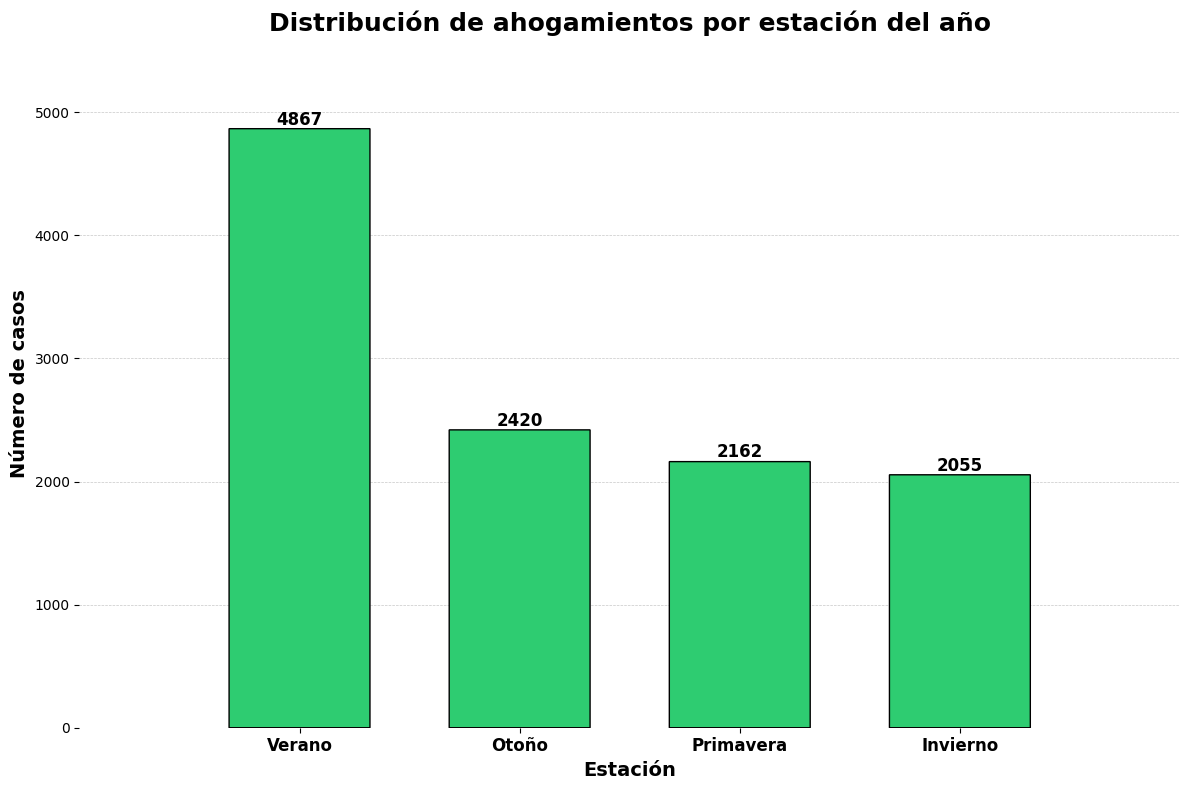

In [40]:


def obtener_estacion(fecha):
    if fecha.month in [12, 1, 2]:
        return 'Invierno'
    elif fecha.month in [3, 4, 5]:
        return 'Primavera'
    elif fecha.month in [6, 7, 8]:
        return 'Verano'
    elif fecha.month in [9, 10, 11]:
        return 'Otoño'

data2['Estacion'] = data2['Fecha'].apply(obtener_estacion)

estacion_counts = data2['Estacion'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Distribución de ahogamientos por estación del año',
             fontsize=18, weight='bold')
ax.set_xlabel('Estación', fontsize=14, weight='bold')
ax.set_ylabel('Número de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(estacion_counts)))
ax.set_xticklabels(estacion_counts.index, rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(estacion_counts.items()):
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),       
        bar_width, value,           
        boxstyle="round,pad=0.02",     
        linewidth=1,
        facecolor='#2ecc71',        
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, value + 1, str(int(value)),
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(estacion_counts))
ax.set_ylim(0, max(estacion_counts.values) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

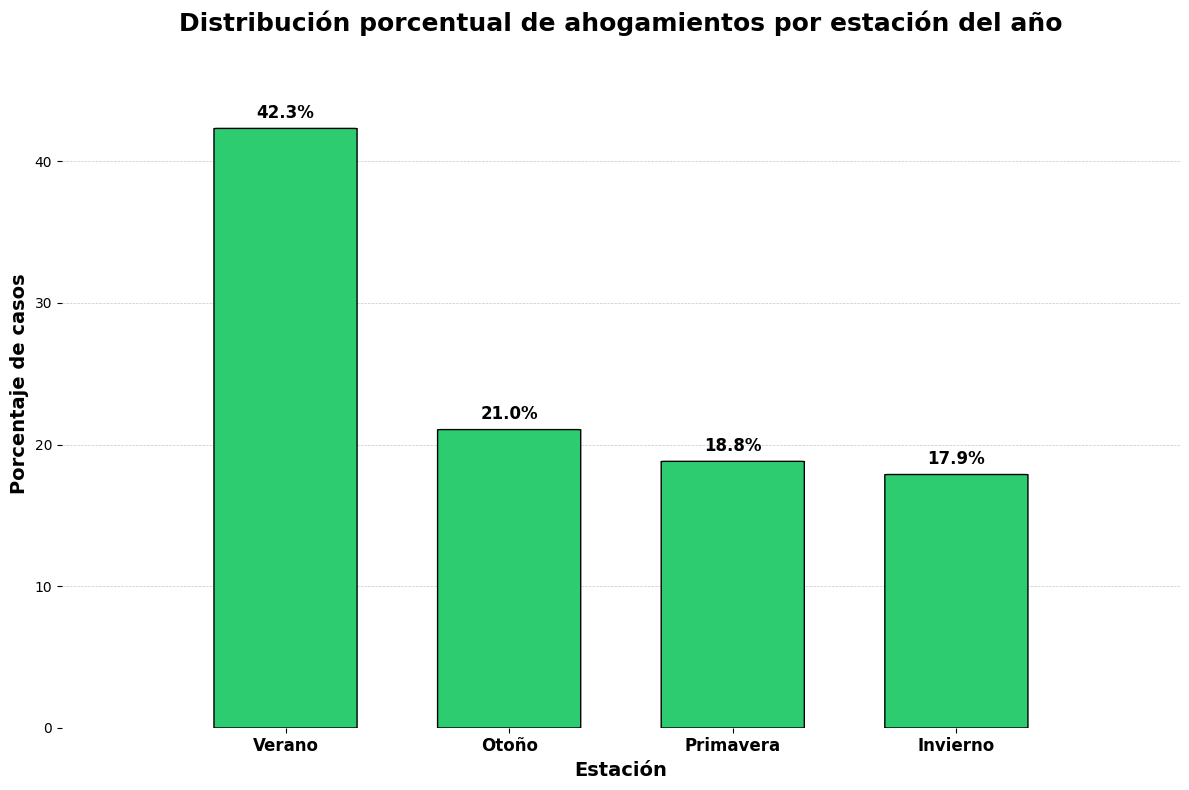

In [41]:

total_ahogamientos = estacion_counts.sum()


fig, ax = plt.subplots(figsize=(12, 8))


ax.set_title('Distribución porcentual de ahogamientos por estación del año',
             fontsize=18, weight='bold')
ax.set_xlabel('Estación', fontsize=14, weight='bold')
ax.set_ylabel('Porcentaje de casos', fontsize=14, weight='bold')
ax.set_xticks(range(len(estacion_counts)))
ax.set_xticklabels(estacion_counts.index, rotation=0, fontsize=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_axisbelow(True)

bar_width = 0.6
for i, (label, value) in enumerate(estacion_counts.items()):
    porcentaje = (value / total_ahogamientos) * 100
    rect = FancyBboxPatch(
        (i - bar_width / 2, 0),     
        bar_width, porcentaje,        
        boxstyle="round,pad=0.02",    
        linewidth=1,
        facecolor='#2ecc71',        
        edgecolor='black'
    )
    ax.add_patch(rect)

    ax.text(i, porcentaje + 0.5, f"{porcentaje:.1f}%",
            ha='center', va='bottom',
            fontsize=12, weight='bold')

ax.set_xlim(-1, len(estacion_counts))
ax.set_ylim(0, max((value / total_ahogamientos) * 100 for value in estacion_counts.values) * 1.15)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_12732\2157803433.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data2.groupby(['Edad_categoria', 'Estacion']).size().unstack(fill_value=0)


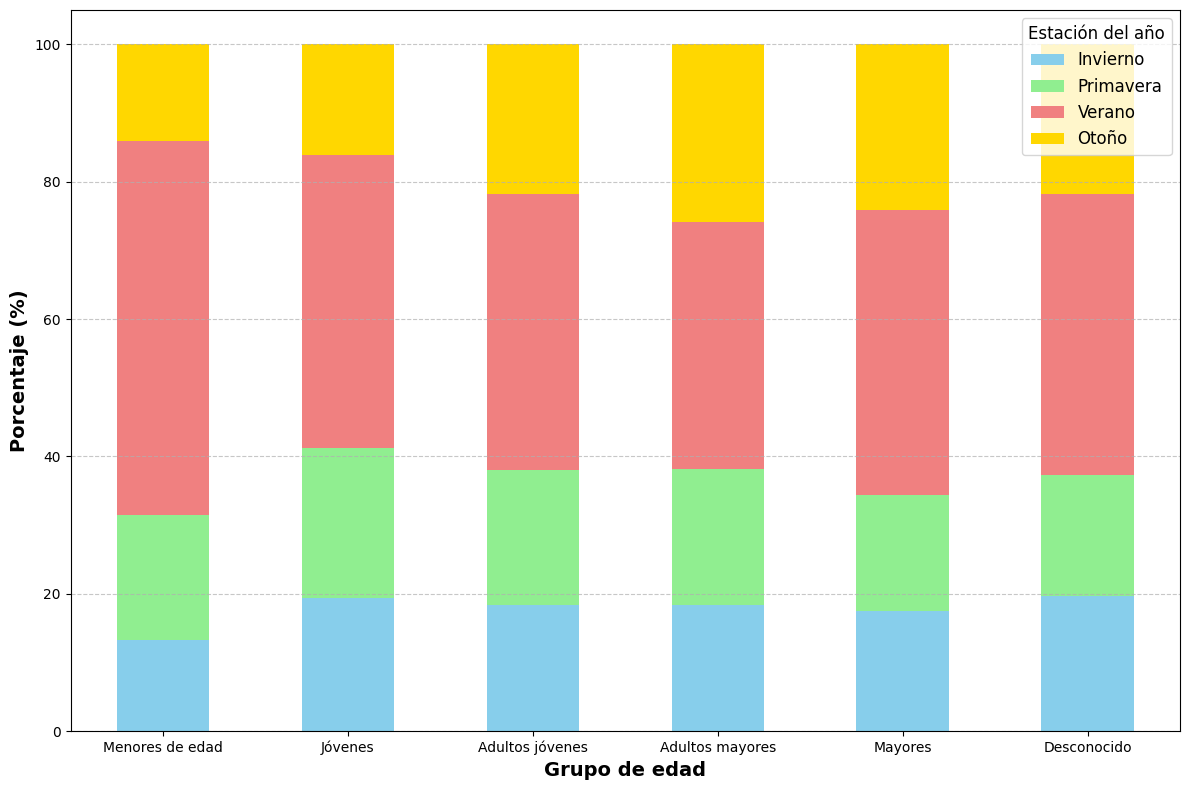

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# -------------------------------
# 1. Mapear estaciones del año
# -------------------------------
def obtener_estacion(fecha):
    if fecha.month in [12, 1, 2]:
        return 'Invierno'
    elif fecha.month in [3, 4, 5]:
        return 'Primavera'
    elif fecha.month in [6, 7, 8]:
        return 'Verano'
    elif fecha.month in [9, 10, 11]:
        return 'Otoño'

data2['Estacion'] = data2['Fecha'].apply(obtener_estacion)



def categorizar_edad(edad):
    if edad < 18:
        return 'Menores de edad'
    elif 18 <= edad <= 30:
        return 'Jóvenes'
    elif 31 <= edad <= 50:
        return 'Adultos jóvenes'
    elif 51 <= edad <= 67:
        return 'Adultos mayores'
    elif edad > 67:
        return 'Mayores'
    else:
        return 'Desconocido'

orden_categorias = ['Menores de edad', 'Jóvenes', 'Adultos jóvenes', 'Adultos mayores', 'Mayores', 'Desconocido']
data2['Edad_categoria'] = pd.Categorical(data2['Edad'].apply(categorizar_edad), categories=orden_categorias, ordered=True)

# -------------------------------
# 3. Agrupar y calcular porcentajes
# -------------------------------

grouped = data2.groupby(['Edad_categoria', 'Estacion']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

orden_estaciones = ['Invierno', 'Primavera', 'Verano', 'Otoño']
colores = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
grouped_percent = grouped_percent[orden_estaciones]

# -------------------------------
# 4. Gráfico de barras apiladas
# -------------------------------

ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=colores)

plt.xlabel('Grupo de edad', fontsize=14, weight='bold')
plt.ylabel('Porcentaje (%)', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Estación del año', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('distribucion_estacion_edad.png', dpi=150, bbox_inches='tight')
plt.show()


In [43]:
import pandas as pd
from datetime import datetime

# -------------------------------
# 1. Clasificar por estación del año
# -------------------------------

def obtener_estacion(fecha):
    if fecha.month in [12, 1, 2]:
        return 'Invierno'
    elif fecha.month in [3, 4, 5]:
        return 'Primavera'
    elif fecha.month in [6, 7, 8]:
        return 'Verano'
    elif fecha.month in [9, 10, 11]:
        return 'Otoño'

data2['Estacion'] = data2['Fecha'].apply(obtener_estacion)

# -------------------------------
# 2. Categorizar edades
# -------------------------------

def categorizar_edad(edad):
    if edad < 18:
        return 'Menores de edad'
    elif 18 <= edad <= 30:
        return 'Jóvenes'
    elif 31 <= edad <= 50:
        return 'Adultos jóvenes'
    elif 51 <= edad <= 67:
        return 'Adultos mayores'
    elif edad > 67:
        return 'Mayores'
    else:
        return 'Desconocido'

orden_categorias = ['Menores de edad', 'Jóvenes', 'Adultos jóvenes', 'Adultos mayores', 'Mayores', 'Desconocido']
data2['Edad_categoria'] = pd.Categorical(data2['Edad'].apply(categorizar_edad), categories=orden_categorias, ordered=True)

# -------------------------------
# 3. Agrupar y calcular porcentajes
# -------------------------------

grouped = data2.groupby(['Edad_categoria', 'Estacion']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# -------------------------------
# 4. Mostrar mayor y menor porcentaje por estación
# -------------------------------

for estacion in grouped_percent.columns:
    print(f"\n Estación: {estacion}")
    max_val = grouped_percent[estacion].max()
    min_val = grouped_percent[estacion].min()
    grupo_max = grouped_percent[grouped_percent[estacion] == max_val].index[0]
    grupo_min = grouped_percent[grouped_percent[estacion] == min_val].index[0]
    print(f"Mayor porcentaje: {grupo_max} ({max_val:.2f}%)")
    print(f"Menor porcentaje: {grupo_min} ({min_val:.2f}%)")



📅 Estación: Invierno
🔺 Mayor porcentaje: Desconocido (19.61%)
🔻 Menor porcentaje: Menores de edad (13.33%)

📅 Estación: Otoño
🔺 Mayor porcentaje: Adultos mayores (25.83%)
🔻 Menor porcentaje: Menores de edad (14.01%)

📅 Estación: Primavera
🔺 Mayor porcentaje: Jóvenes (21.86%)
🔻 Menor porcentaje: Mayores (16.88%)

📅 Estación: Verano
🔺 Mayor porcentaje: Menores de edad (54.56%)
🔻 Menor porcentaje: Adultos mayores (36.02%)


C:\Users\Pablo\AppData\Local\Temp\ipykernel_12732\913522121.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data2.groupby(['Edad_categoria', 'Estacion']).size().unstack(fill_value=0)


MORTAL- NO MORTAL

In [44]:

pronostico_percent = (data2['Pronostico'].value_counts(normalize=True) * 100).round(2)

print(pronostico_percent)
muerte = ['Ahogamiento mortal', 'Fallecimiento Sin Ahogamiento']
no_muerte = [
    'Rescate y traslado a supervisión médica',
    'Ahogamiento no mortal con hospitalizacion',
    'Rescate sin consecuencias',
    'Traumatismo/TRM',
    'Rescate con necesidad de observación posterior',
    'Lesiones'
]

data2['Resultado'] = data2['Pronostico'].apply(lambda x: 'Mortal' if x in muerte else 'No Mortal')

resultado_percent = (data2['Resultado'].value_counts(normalize=True) * 100).round(2)

print(resultado_percent)

Pronostico
Ahogamiento mortal                                44.51
Rescate sin consecuencias                         28.60
Ahogamiento no mortal con hospitalizacion         13.33
Rescate y traslado a supervisión médica            8.76
Lesiones                                           2.38
Traumatismo/TRM                                    1.51
Rescate con necesidad de observación posterior     0.52
Fallecimiento Sin Ahogamiento                      0.27
Sin datos                                          0.10
Name: proportion, dtype: float64
Resultado
No Mortal    55.22
Mortal       44.78
Name: proportion, dtype: float64


C:\Users\Pablo\AppData\Local\Temp\ipykernel_12732\3554102528.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data2.groupby(['Edad_categoria', 'Resultado']).size().unstack(fill_value=0)


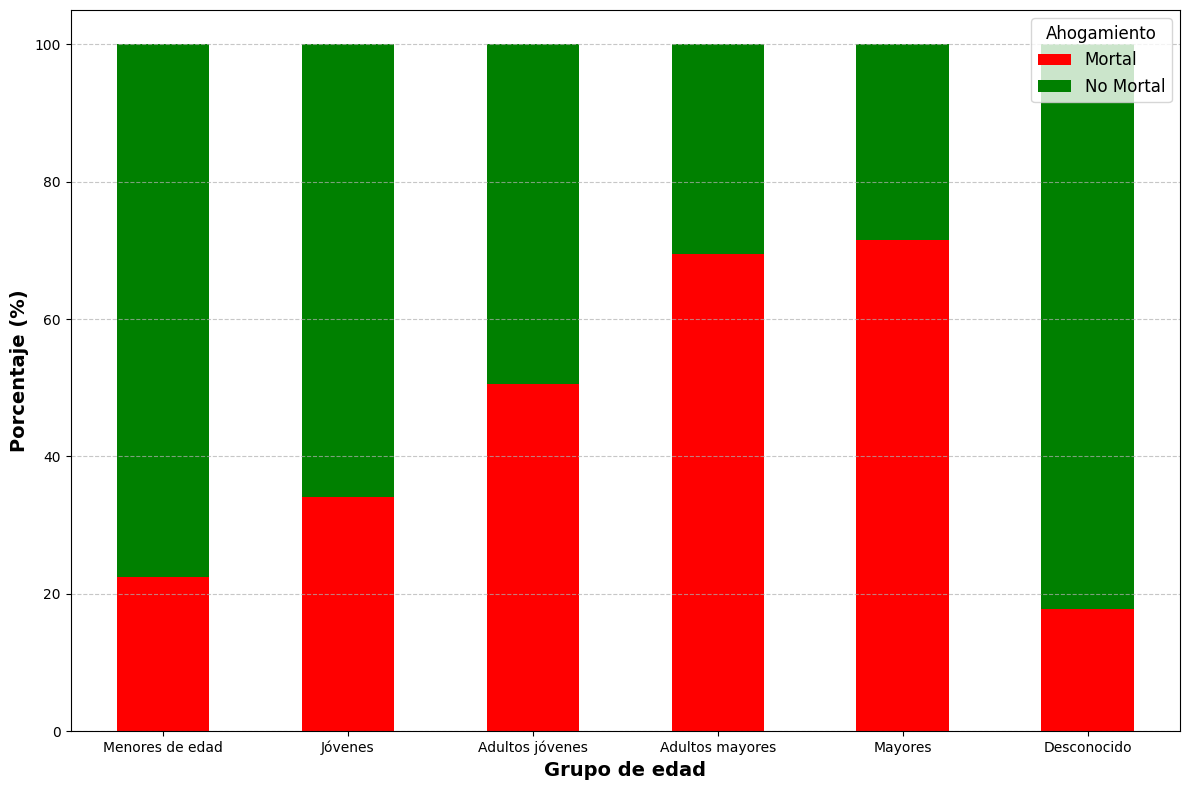

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Clasificar pronósticos
# -------------------------------

muerte = ['Ahogamiento mortal', 'Fallecimiento Sin Ahogamiento']
no_muerte = [
    'Rescate y traslado a supervisión médica',
    'Ahogamiento no mortal con hospitalizacion',
    'Rescate sin consecuencias',
    'Traumatismo/TRM',
    'Rescate con necesidad de observación posterior',
    'Lesiones'
]

data2['Resultado'] = data2['Pronostico'].apply(lambda x: 'Mortal' if x in muerte else 'No Mortal')

# -------------------------------
# 2. Categorizar edades
# -------------------------------

def categorizar_edad(edad):
    if edad < 18:
        return 'Menores de edad'
    elif 18 <= edad <= 30:
        return 'Jóvenes'
    elif 31 <= edad <= 50:
        return 'Adultos jóvenes'
    elif 51 <= edad <= 67:
        return 'Adultos mayores'
    elif edad > 67:
        return 'Mayores'
    else:
        return 'Desconocido'

orden_categorias = ['Menores de edad', 'Jóvenes', 'Adultos jóvenes', 'Adultos mayores', 'Mayores', 'Desconocido']
data2['Edad_categoria'] = pd.Categorical(data2['Edad'].apply(categorizar_edad), categories=orden_categorias, ordered=True)

# -------------------------------
# 3. Agrupar y calcular porcentajes
# -------------------------------

grouped = data2.groupby(['Edad_categoria', 'Resultado']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# -------------------------------
# 4. Gráfico de barras apiladas
# -------------------------------

orden_resultados = ['Mortal', 'No Mortal']
colores = ['red', 'green']
grouped_percent = grouped_percent[orden_resultados]

ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=colores)

plt.xlabel('Grupo de edad', fontsize=14, weight='bold')
plt.ylabel('Porcentaje (%)', fontsize=14, weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Ahogamiento', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('distribucion_pronostico_edad.png', dpi=150, bbox_inches='tight')
plt.show()


In [46]:

grouped_percent_sin_desconocido = grouped_percent.drop('Desconocido')


grupo_mayor_mortal_sin_desconocido = grouped_percent_sin_desconocido['Mortal'].idxmax()
porcentaje_mayor_mortal_sin_desconocido = grouped_percent_sin_desconocido['Mortal'].max()

grupo_mayor_no_mortal_sin_desconocido = grouped_percent_sin_desconocido['No Mortal'].idxmax()
porcentaje_mayor_no_mortal_sin_desconocido = grouped_percent_sin_desconocido['No Mortal'].max()

print(f"El grupo con el mayor porcentaje de casos mortales (sin 'Desconocido') es '{grupo_mayor_mortal_sin_desconocido}' con un {porcentaje_mayor_mortal_sin_desconocido:.2f}%.")
print(f"El grupo con el mayor porcentaje de casos no mortales (sin 'Desconocido') es '{grupo_mayor_no_mortal_sin_desconocido}' con un {porcentaje_mayor_no_mortal_sin_desconocido:.2f}%.")

El grupo con el mayor porcentaje de casos mortales (sin 'Desconocido') es 'Mayores' con un 71.46%.
El grupo con el mayor porcentaje de casos no mortales (sin 'Desconocido') es 'Menores de edad' con un 77.61%.


###     -Mapa España


In [47]:
cuenta_provincias = data2['Provincia'].value_counts()
print(cuenta_provincias)

Provincia
Alicante         784
A Coruña         766
Valencia         731
Tenerife         729
Gran Canaria     554
Murcia           539
Pontevedra       535
Mallorca         491
Asturias         483
Cádiz            424
Málaga           406
Tarragona        338
Cantabria        311
Castellón        293
Lugo             271
Fuerteventura    263
Girona           252
Lanzarote        251
Vizcaya          219
Almería          201
Gipuzkoa         180
Barcelona        170
Huelva           149
Ibiza            147
Granada          141
Madrid           120
Sevilla          118
Menorca          109
Zaragoza          97
Navarra           93
Badajoz           76
Huesca            75
Ourense           74
Valladolid        66
Córdoba           65
Toledo            65
Lleida            63
Cáceres           61
León              59
Ceuta             55
La Palma          55
Salamanca         53
La Gomera         48
Formentera        48
Cuenca            42
Burgos            42
La Rioja          38
Ávi

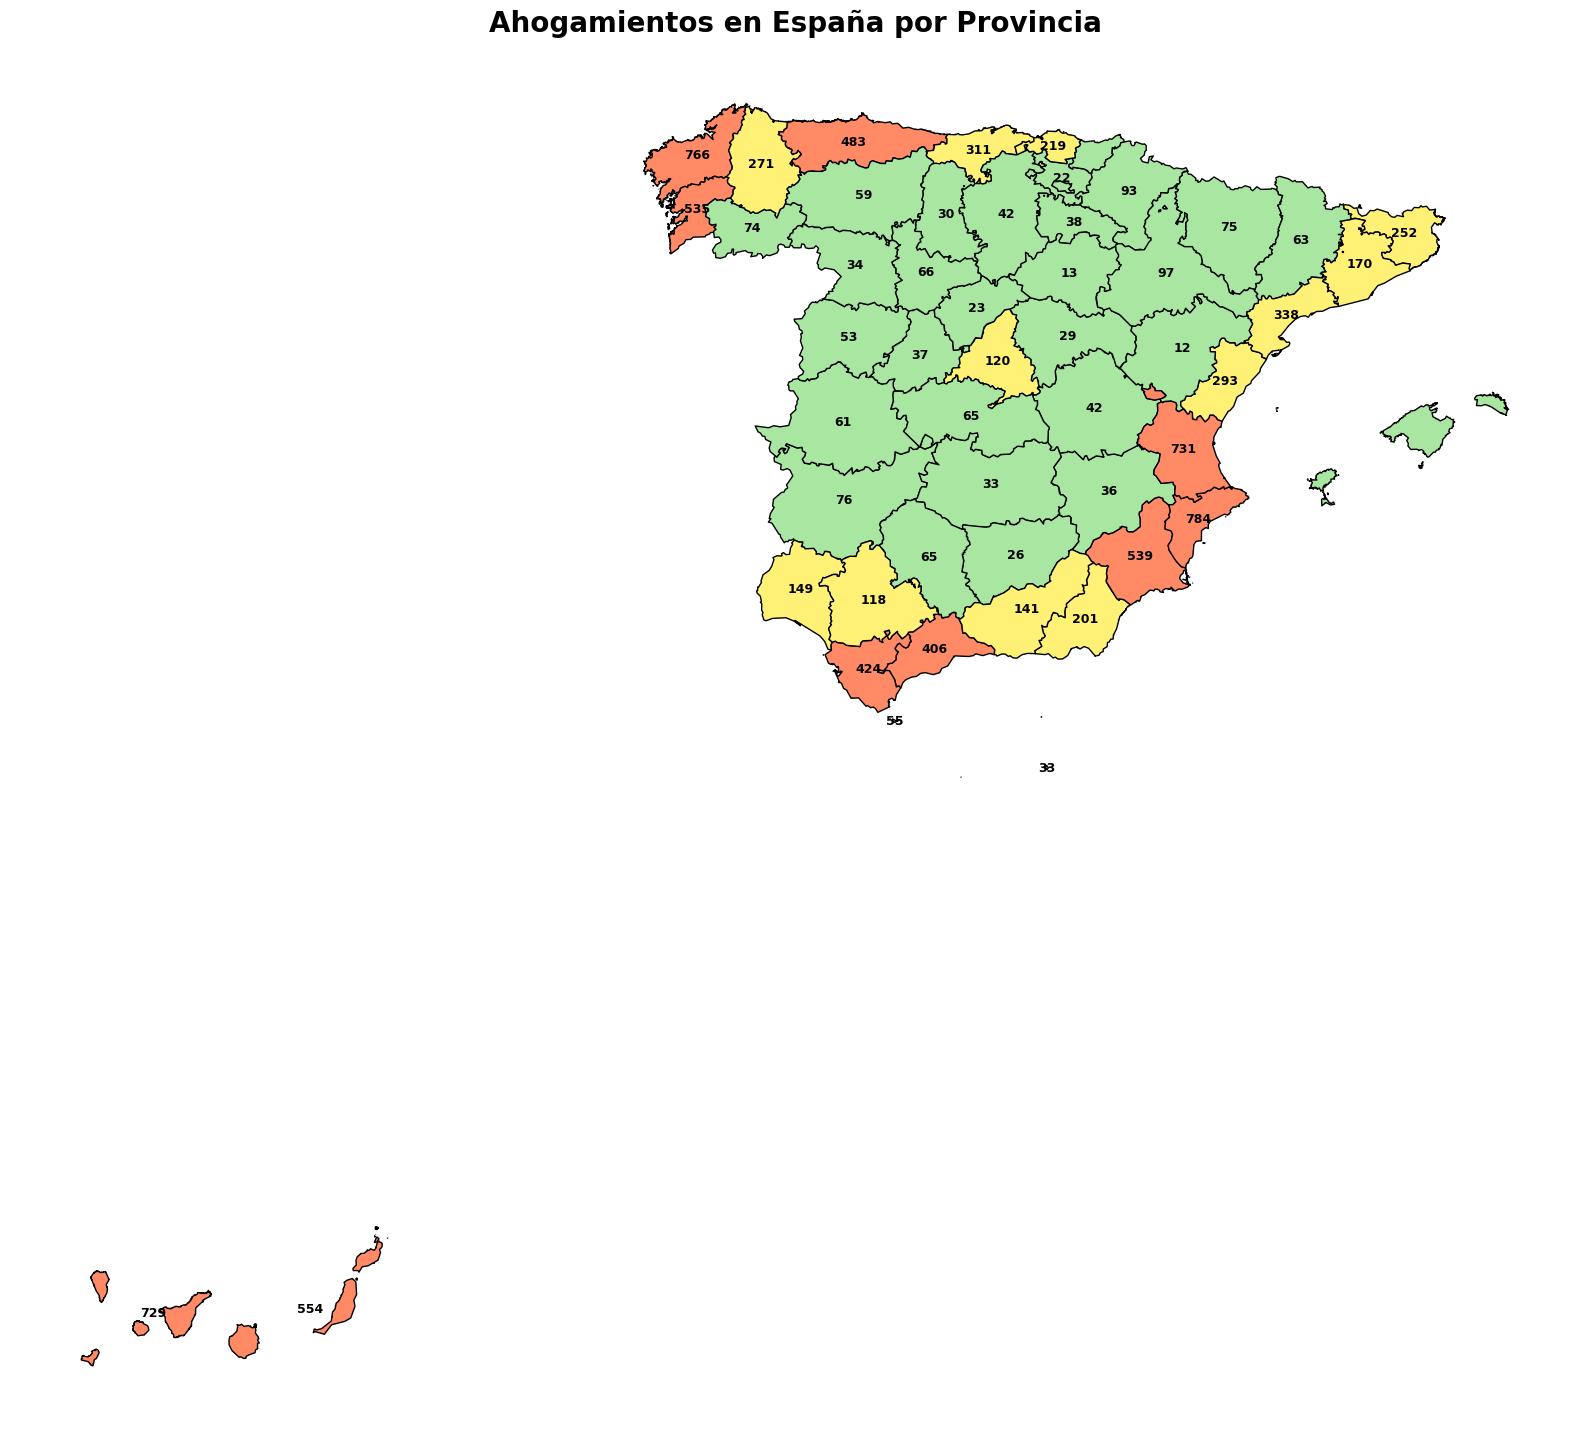

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson"
provincias = gpd.read_file(url)

ahogamientos = data2['Provincia'].value_counts().reset_index()
ahogamientos.columns = ['provincia', 'ahogamientos']

reemplazos = {
    'València/Valencia': 'Valencia',
    'Castelló/Castellón': 'Castellón',
    'Alacant/Alicante': 'Alicante',
    'Bizkaia/Vizcaya': 'Vizcaya',
    'Gipuzkoa/Guipúzcoa': 'Guipuzcoa',
    'Araba/Álava': 'Álava',
    'Illes Balears': 'Islas Baleares',
    'Santa Cruz De Tenerife': 'Tenerife',
    'Las Palmas': 'Gran Canaria',
}

def normalizar_nombre(nombre):
    if nombre in reemplazos:
        return reemplazos[nombre]
    if '/' in nombre:
        return nombre.split('/')[-1].strip()
    return nombre.strip()

provincias['provincia_normalizada'] = provincias['name'].apply(normalizar_nombre)

provincias = provincias.merge(ahogamientos, left_on='provincia_normalizada', right_on='provincia', how='left')
provincias['ahogamientos'] = provincias['ahogamientos'].fillna(0)

def color_categoria(x):
    if x < 100:
        return '#A8E6A1'  
    elif x < 400:
        return '#FFF176'  
    else:
        return '#FF8A65

provincias['color'] = provincias['ahogamientos'].apply(color_categoria)


fig, ax = plt.subplots(figsize=(16, 16))
provincias.plot(ax=ax, color=provincias['color'], edgecolor='black')

for idx, row in provincias.iterrows():
    if not row['geometry'].is_empty:
        centroid = row['geometry'].centroid
        valor = int(row['ahogamientos'])
        if valor > 0:
            ax.text(centroid.x, centroid.y, str(valor), fontsize=9, ha='center', va='center', weight='bold')

ax.set_title("Ahogamientos en España por Provincia", fontsize=20, weight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()


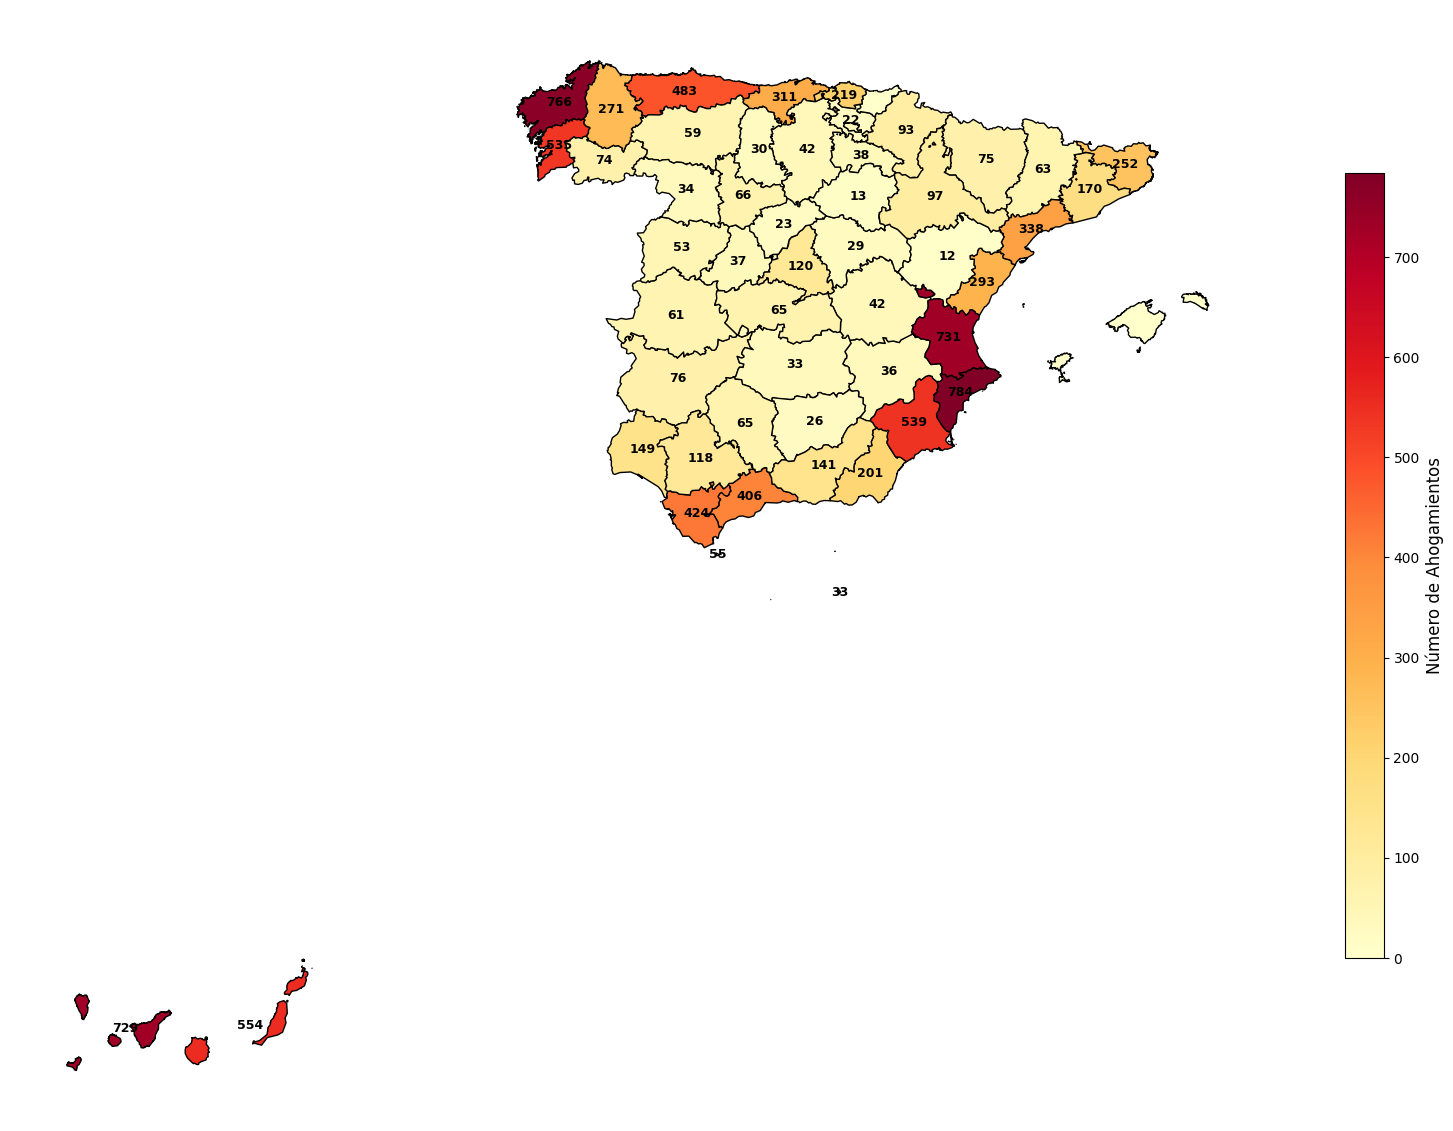

In [59]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson"
provincias = gpd.read_file(url)

ahogamientos = data2['Provincia'].value_counts().reset_index()
ahogamientos.columns = ['provincia', 'ahogamientos']

reemplazos = {
    'València/Valencia': 'Valencia',
    'Castelló/Castellón': 'Castellón',
    'Alacant/Alicante': 'Alicante',
    'Bizkaia/Vizcaya': 'Vizcaya',
    'Gipuzkoa/Guipúzcoa': 'Guipuzcoa',
    'Araba/Álava': 'Álava',
    'Illes Balears': 'Islas Baleares',
    'Santa Cruz De Tenerife': 'Tenerife',
    'Las Palmas': 'Gran Canaria',
}

def normalizar_nombre(nombre):
    if nombre in reemplazos:
        return reemplazos[nombre]
    if '/' in nombre:
        return nombre.split('/')[-1].strip()
    return nombre.strip()

provincias['provincia_normalizada'] = provincias['name'].apply(normalizar_nombre)

provincias = provincias.merge(ahogamientos, left_on='provincia_normalizada', right_on='provincia', how='left')
provincias['ahogamientos'] = provincias['ahogamientos'].fillna(0)

cmap = plt.cm.YlOrRd 
norm = mcolors.Normalize(vmin=provincias['ahogamientos'].min(), vmax=provincias['ahogamientos'].max())
provincias['color'] = provincias['ahogamientos'].apply(lambda x: cmap(norm(x)))

fig, ax = plt.subplots(figsize=(16, 16))
provincias.plot(ax=ax, color=provincias['color'], edgecolor='black')

for idx, row in provincias.iterrows():
    if not row['geometry'].is_empty:
        centroid = row['geometry'].centroid
        valor = int(row['ahogamientos'])
        if valor > 0:
            ax.text(centroid.x, centroid.y, str(valor), fontsize=9, ha='center', va='center', weight='bold')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Número de Ahogamientos', fontsize=12)

ax.axis('off')
plt.tight_layout()
plt.savefig('distribucion_provincia.png', dpi=300, bbox_inches='tight')
plt.show()


In [50]:
provincias['porcentaje'] = (provincias['ahogamientos'] / provincias['ahogamientos'].sum()) * 100

provincias_ordenadas = provincias[['provincia_normalizada', 'ahogamientos', 'porcentaje']].sort_values(by='porcentaje', ascending=False)

print(provincias_ordenadas)

   provincia_normalizada  ahogamientos  porcentaje
15              Alicante         784.0    7.930407
2               A Coruña         766.0    7.748331
46              Valencia         731.0    7.394295
6               Tenerife         729.0    7.374064
4           Gran Canaria         554.0    5.603884
10                Murcia         539.0    5.452155
5             Pontevedra         535.0    5.411693
1               Asturias         483.0    4.885697
20                 Cádiz         424.0    4.288893
8                 Málaga         406.0    4.106818
44             Tarragona         338.0    3.418976
7              Cantabria         311.0    3.145863
21             Castellón         293.0    2.963787
37                  Lugo         271.0    2.741250
3                 Girona         252.0    2.549059
48               Vizcaya         219.0    2.215254
9                Almería         201.0    2.033178
17             Barcelona         170.0    1.719603
29                Huelva       

In [51]:
print(provincias['name'].unique())

['Illes Balears' 'Asturias' 'A Coruña' 'Girona' 'Las Palmas' 'Pontevedra'
 'Santa Cruz De Tenerife' 'Cantabria' 'Málaga' 'Almería' 'Murcia'
 'Albacete' 'Ávila' 'Araba/Álava' 'Badajoz' 'Alacant/Alicante' 'Ourense'
 'Barcelona' 'Burgos' 'Cáceres' 'Cádiz' 'Castelló/Castellón' 'Ciudad Real'
 'Jaén' 'Córdoba' 'Cuenca' 'Granada' 'Guadalajara' 'Gipuzkoa/Guipúzcoa'
 'Huelva' 'Huesca' 'León' 'Lleida' 'La Rioja' 'Soria' 'Navarra' 'Ceuta'
 'Lugo' 'Madrid' 'Palencia' 'Salamanca' 'Segovia' 'Sevilla' 'Toledo'
 'Tarragona' 'Teruel' 'València/Valencia' 'Valladolid' 'Bizkaia/Vizcaya'
 'Zamora' 'Zaragoza' 'Melilla']


vemos si podemos hacerlo para comunidad autonoma

In [52]:
ccaa = gpd.read_file("Spain.json") 

print(ccaa['region'].unique())

[None 'País Vasco' 'Castilla-La Mancha' 'Valenciana' 'Andalucía'
 'Asturias' 'Castilla y León' 'Extremadura' 'Islas Baleares' 'Cataluña'
 'Cantabria' 'Ceuta' 'Aragón' 'Galicia' 'La Rioja' 'Canary Is.' 'Madrid'
 'Melilla' 'Murcia' 'Foral de Navarra']


In [53]:
cuenta_provincias = data2['CCAA'].value_counts()
print(cuenta_provincias)

CCAA
Canarias              1926
Cdad Valenciana       1808
Galicia               1646
Andalucía             1530
Cataluña               823
Baleares               795
Murcia                 539
Asturias               483
Euskadi                421
Castilla y León        357
Cantabria              311
Castilla La Mancha     205
Aragón                 184
Extremadura            137
Madrid                 120
Navarra                 93
Ceuta                   55
La Rioja                38
Melilla                 33
Name: count, dtype: int64


In [54]:
import geopandas as gpd
import matplotlib.patches as patches

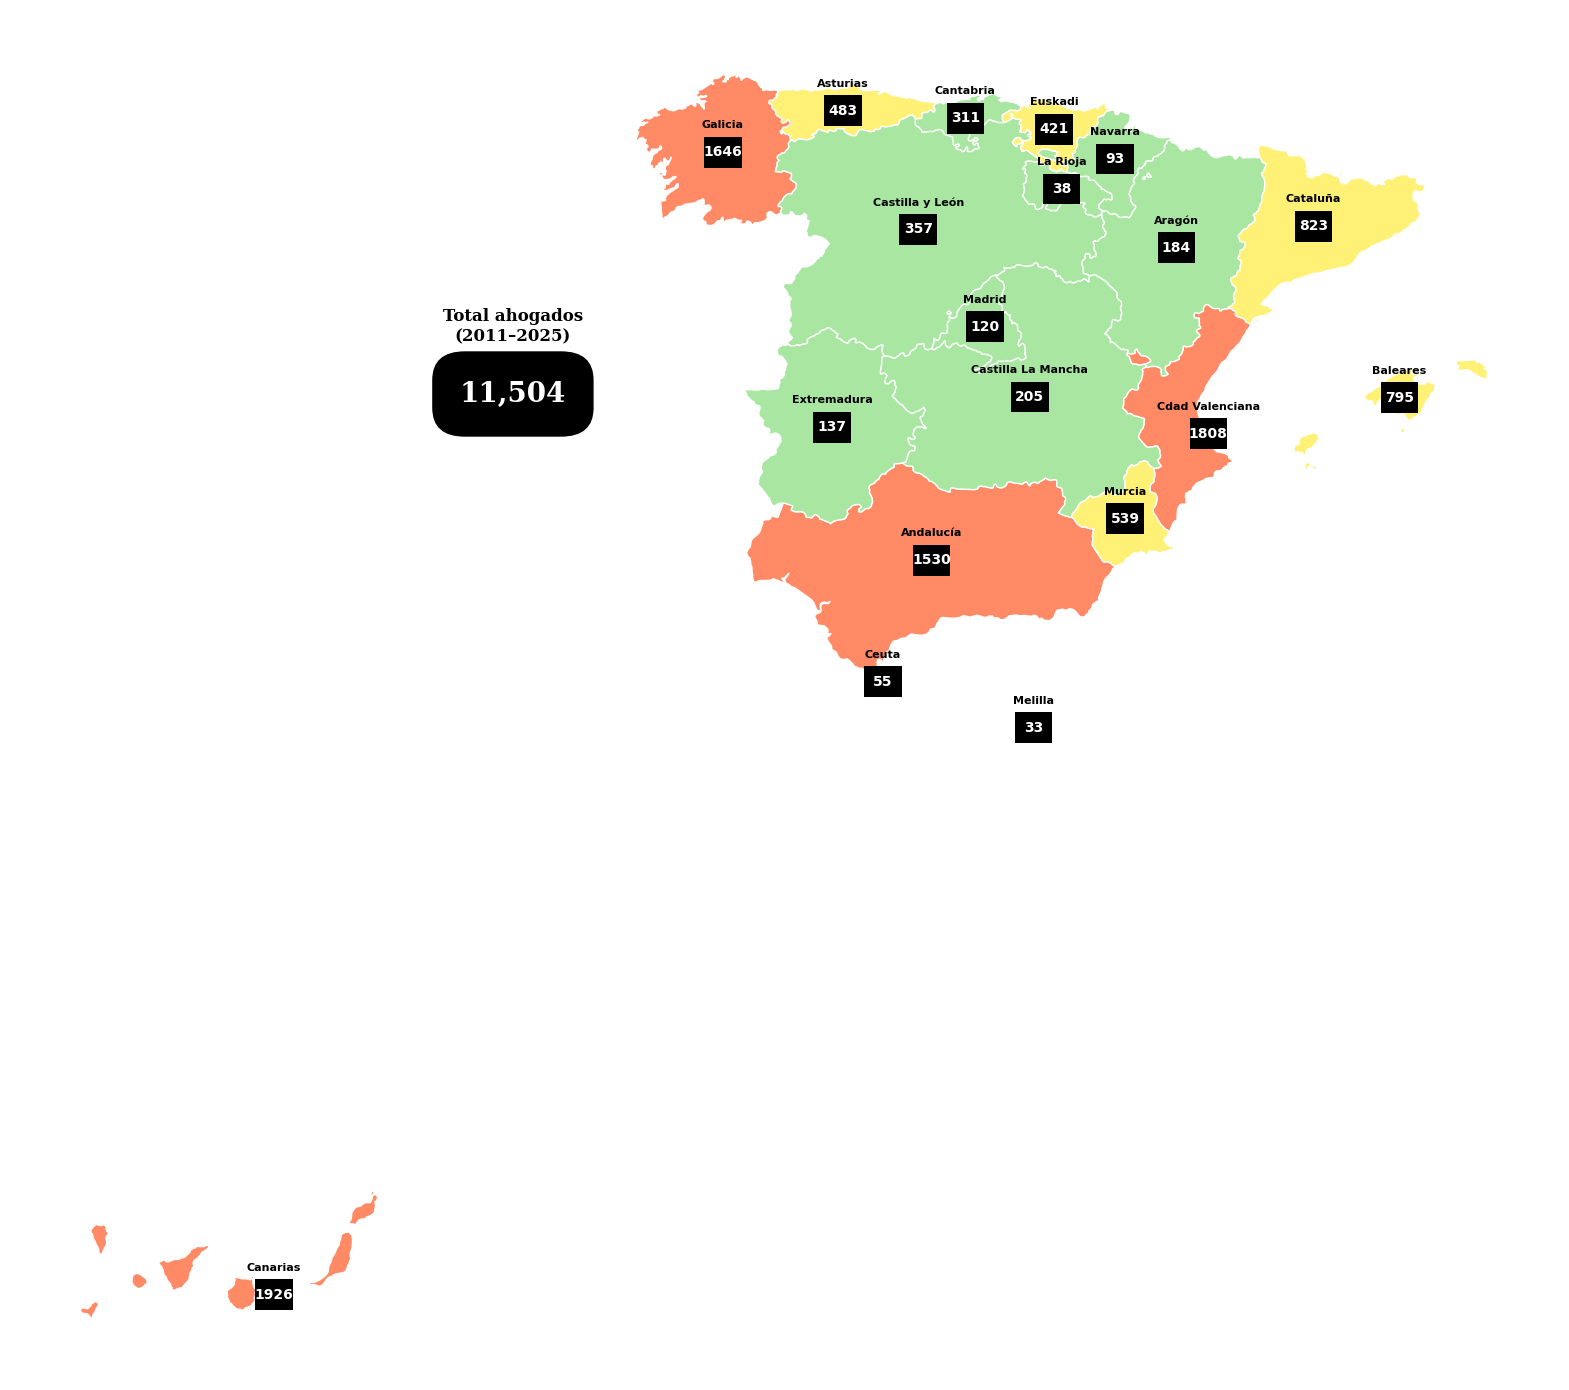

In [55]:

ccaa = gpd.read_file("Spain.json")

ccaa['comunidad'] = ccaa['region'].fillna(ccaa['woe_name'])

reemplazos = {
    'País Vasco': 'Euskadi',
    'Balearic Islands': 'Islas Baleares',
    'Canary Is.': 'Canarias',
    'Foral de Navarra': 'Navarra',
    'Castilla-La Mancha': 'Castilla La Mancha',
    'Valenciana': 'Cdad Valenciana',
    'Islas Baleares': 'Baleares'
}
ccaa['comunidad'] = ccaa['comunidad'].replace(reemplazos)

ccaa_grouped = ccaa.dissolve(by='comunidad', as_index=False)

ahogamientos = data2['CCAA'].value_counts().reset_index()
ahogamientos.columns = ['comunidad', 'ahogamientos']

ccaa_grouped = ccaa_grouped.merge(ahogamientos, on='comunidad', how='left')
ccaa_grouped['ahogamientos'] = ccaa_grouped['ahogamientos'].fillna(0)

def color_categoria(x):
    if x < 400:
        return '#A8E6A1' 
    elif x < 1500:
        return '#FFF176' 
    else:
        return '#FF8A65' 

ccaa_grouped['color'] = ccaa_grouped['ahogamientos'].apply(color_categoria)

fig, ax = plt.subplots(figsize=(16, 14))
ccaa_grouped.plot(ax=ax, color=ccaa_grouped['color'], edgecolor='white')

desplazamientos = {
    'Cdad Valenciana': (0.4, -0.3),
    'Canarias': (0.6, -0.4)
}
for idx, row in ccaa_grouped.iterrows():
    if not row['geometry'].is_empty:
        centroid = row['geometry'].centroid
        valor = int(row['ahogamientos'])
        nombre = row['comunidad']

        dx, dy = desplazamientos.get(nombre, (0, 0))
        x = centroid.x + dx
        y = centroid.y + dy

        ax.text(x, y + 0.35, nombre,
                fontsize=8, ha='center', va='center',
                color='black', weight='bold')

        box_width, box_height = 0.6, 0.4
        rect = patches.Rectangle(
            (x - box_width / 2, y - box_height / 2),
            box_width, box_height,
            linewidth=0,
            facecolor='black',
            zorder=3
        )
        ax.add_patch(rect)

        ax.text(x, y, str(valor),
                fontsize=10, ha='center', va='center',
                color='white', weight='bold', zorder=4)

total_ahogados = len(data2)

fig_width, fig_height = fig.get_size_inches()
fig_x = 0.83
fig_y = 0.55

fig.text(fig_x - 0.5, fig_y + 0.2, "Total ahogados\n(2011–2025)",
         fontsize=12,
         ha='center',
         va='bottom',
         color='black',
         weight='bold',
         fontfamily='serif')

rect = patches.FancyBboxPatch(
    (fig_x - 0.53, fig_y + 0.155),
    0.06, 0.02,
    boxstyle="round,pad=0.02",
    linewidth=1,
    edgecolor='black',
    facecolor='black',
    transform=fig.transFigure,
    zorder=10
)
fig.patches.append(rect)

fig.text(fig_x - 0.50, fig_y + 0.165, f"{total_ahogados:,}",
         fontsize=20,
         ha='center',
         va='center',
         color='white',
         weight='bold',
         fontfamily='DejaVu Serif',
         zorder=20)

ax.axis('off')
plt.tight_layout()
plt.savefig('distribucion_ccaa.png', dpi=150, bbox_inches='tight')
plt.show()


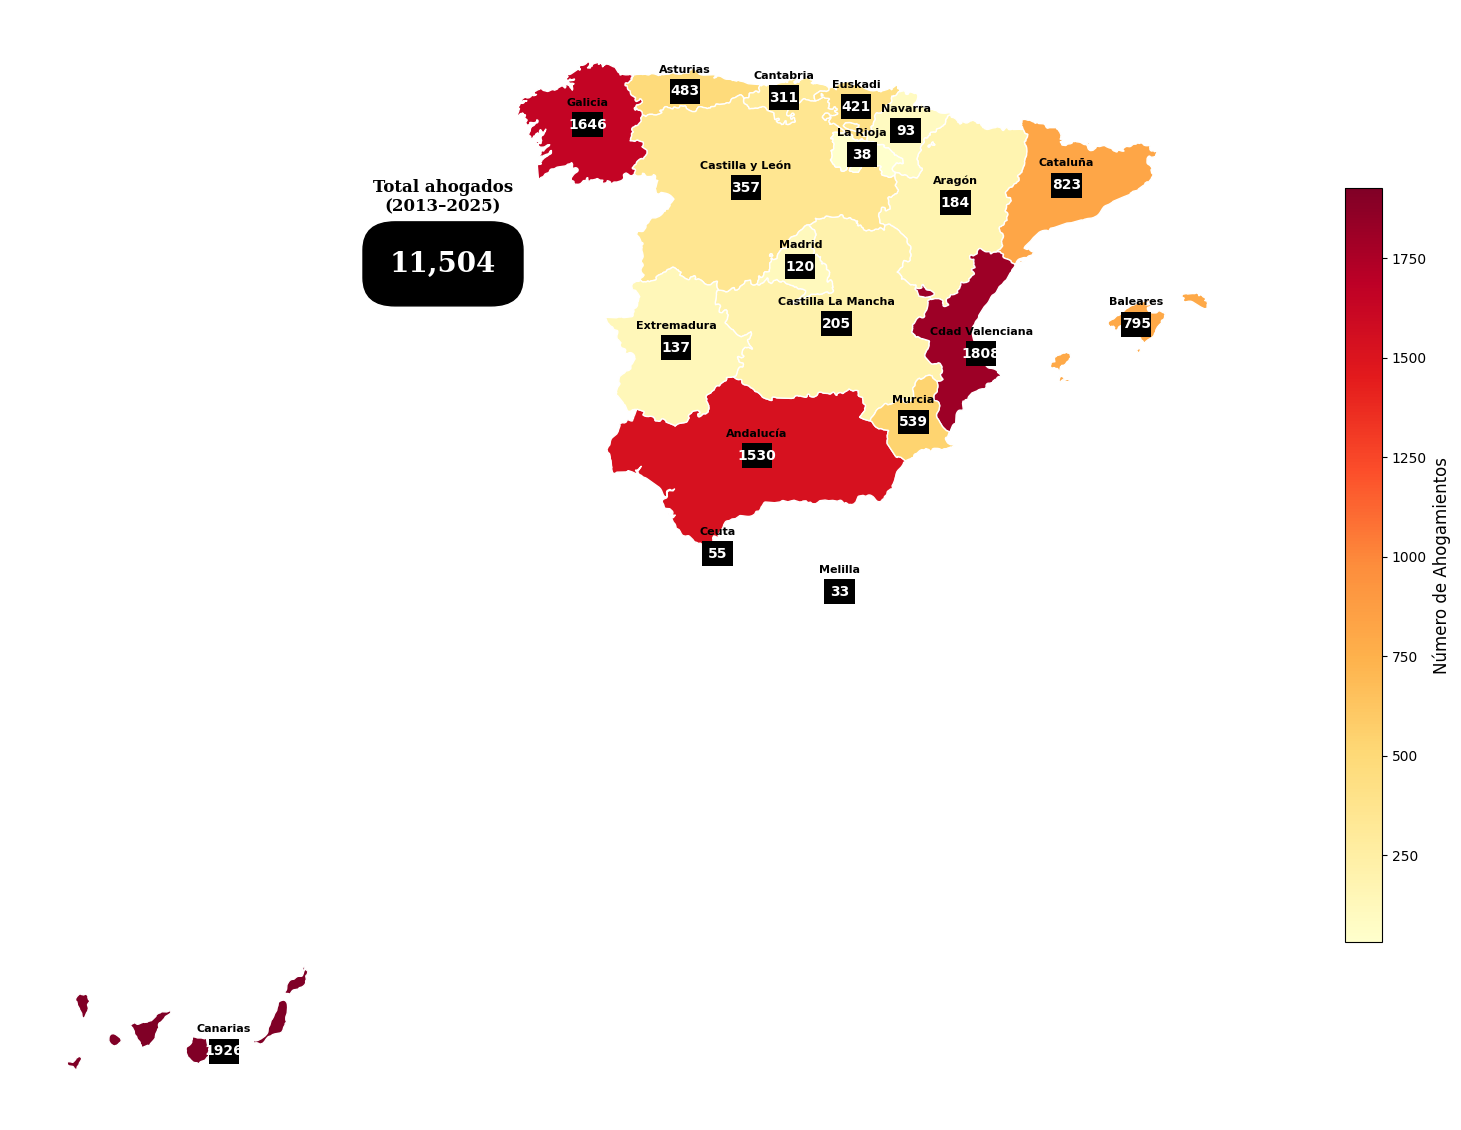

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches

ccaa = gpd.read_file("Spain.json")


ccaa['comunidad'] = ccaa['region'].fillna(ccaa['woe_name'])

reemplazos = {
    'País Vasco': 'Euskadi',
    'Balearic Islands': 'Islas Baleares',
    'Canary Is.': 'Canarias',
    'Foral de Navarra': 'Navarra',
    'Castilla-La Mancha': 'Castilla La Mancha',
    'Valenciana': 'Cdad Valenciana',
    'Islas Baleares': 'Baleares'
}
ccaa['comunidad'] = ccaa['comunidad'].replace(reemplazos)

ccaa_grouped = ccaa.dissolve(by='comunidad', as_index=False)

ahogamientos = data2['CCAA'].value_counts().reset_index()
ahogamientos.columns = ['comunidad', 'ahogamientos']

ccaa_grouped = ccaa_grouped.merge(ahogamientos, on='comunidad', how='left')
ccaa_grouped['ahogamientos'] = ccaa_grouped['ahogamientos'].fillna(0)


cmap = plt.cm.YlOrRd             
norm = mcolors.Normalize(
    vmin=ccaa_grouped['ahogamientos'].min(),
    vmax=ccaa_grouped['ahogamientos'].max()
)
ccaa_grouped['color'] = ccaa_grouped['ahogamientos'].apply(lambda x: cmap(norm(x)))

fig, ax = plt.subplots(figsize=(16, 14))
ccaa_grouped.plot(ax=ax, color=ccaa_grouped['color'], edgecolor='white')

desplazamientos = {
    'Cdad Valenciana': (0.4, -0.3),
    'Canarias': (0.6, -0.4)
}

for _, row in ccaa_grouped.iterrows():
    if not row['geometry'].is_empty:
        centroid = row['geometry'].centroid
        valor = int(row['ahogamientos'])
        nombre = row['comunidad']

        dx, dy = desplazamientos.get(nombre, (0, 0))
        x, y = centroid.x + dx, centroid.y + dy
        ax.text(x, y + 0.35, nombre,
                fontsize=8, ha='center', va='center',
                color='black', weight='bold')

        rect = patches.Rectangle(
            (x - 0.3, y - 0.2), 0.6, 0.4,
            linewidth=0, facecolor='black', zorder=3
        )
        ax.add_patch(rect)

        ax.text(x, y, f"{valor}",
                fontsize=10, ha='center', va='center',
                color='white', weight='bold', zorder=4)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.55)
cbar.set_label('Número de Ahogamientos', fontsize=12)

total_ahogados = len(data2)

fig.text(fig_x - 0.55, fig_y + 0.2, "Total ahogados\n(2013–2025)",
         fontsize=12,
         ha='center',
         va='bottom',
         color='black',
         weight='bold',
         fontfamily='serif')

rect = patches.FancyBboxPatch(
    (fig_x - 0.58, fig_y + 0.155),
    0.06, 0.02,
    boxstyle="round,pad=0.02",
    linewidth=1,
    edgecolor='black',
    facecolor='black',
    transform=fig.transFigure,
    zorder=10
)
fig.patches.append(rect)

fig.text(fig_x - 0.55, fig_y + 0.165, f"{total_ahogados:,}",
         fontsize=20,
         ha='center',
         va='center',
         color='white',
         weight='bold',
         fontfamily='DejaVu Serif',
         zorder=20)

ax.axis('off')
plt.tight_layout()
plt.savefig('distribucion_ccaa.png', dpi=300, bbox_inches='tight')
plt.show()


In [57]:
ahogamientos['porcentaje'] = (ahogamientos['ahogamientos'] / ahogamientos['ahogamientos'].sum()) * 100

for _, row in ahogamientos.iterrows():
    print(f"{row['comunidad']}: {row['porcentaje']:.2f}%")

Canarias: 16.74%
Cdad Valenciana: 15.72%
Galicia: 14.31%
Andalucía: 13.30%
Cataluña: 7.15%
Baleares: 6.91%
Murcia: 4.69%
Asturias: 4.20%
Euskadi: 3.66%
Castilla y León: 3.10%
Cantabria: 2.70%
Castilla La Mancha: 1.78%
Aragón: 1.60%
Extremadura: 1.19%
Madrid: 1.04%
Navarra: 0.81%
Ceuta: 0.48%
La Rioja: 0.33%
Melilla: 0.29%
